In [10]:
# Inisialisasi Library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import cv2
from math import *

imageArray = [ 'dataset/Screenshot5.png','dataset/Screenshot3.png','dataset/dataset4.png','dataset/4dots.jpg', 'dataset/dataset2.png']
imageArray1 = ['dataset/dataset3.png']

# membuat fungsi untuk plotting dimensi partikel
def dimensi_partikel(ax, nilaiX, nilaiY, ukuranX, ukuranY, edgeColor,facecolor='none'):
    # startX = abs(nilaiX-(1/2*ukuranX)).astype(int)
    # startY = abs(nilaiY-(1/2*ukuranY)).astype(int)

    # mengatur posisi dan dimensi tiap-tiap partikel dengan looping
    kotak_dimensi = [Rectangle((x, y), panjangX, panjangY)
                  for x, y, panjangX, panjangY in zip(nilaiX, nilaiY, ukuranX, ukuranY)]

    pc = PatchCollection(kotak_dimensi, facecolor=facecolor,
                         edgecolor=edgeColor)

    ax.add_collection(pc)

def dimensi_gbest(ax, x, y, ukuranX, ukuranY, edgeColor, faceColor='none'):
    startX = abs(x-(1/2*ukuranX)).astype(int)
    startY = abs(y-(1/2*ukuranY)).astype(int)

    # mengatur posisi dan dimensi tiap-tiap partikel dengan looping
    kotak_dimensi = [Rectangle((x, y), panjangX, panjangY)
                  for x, y, panjangX, panjangY in zip(startX, startY, ukuranX, ukuranY)]

    pc = PatchCollection(kotak_dimensi, facecolor=faceColor,
                         edgecolor=edgeColor)

    ax.add_collection(pc)

def fitSum(x,y,gambar, windowX, windowY):
    # print([x,y])

    x[(x-(gambar.shape[1])).astype(int) >= 0] = (x[(x-(gambar.shape[1])).astype(int) >= 0]-((x[(x-(gambar.shape[1])).astype(int) >= 0]-(gambar.shape[1])).astype(int))).astype(int)
    y[(y-(gambar.shape[0])).astype(int) >= 0] = (y[(y-(gambar.shape[0])).astype(int) >= 0]-((y[(y-(gambar.shape[0])).astype(int) >= 0]-(gambar.shape[0])).astype(int))).astype(int)
    
    startX = abs(x-(1/2*windowX)).astype(int)
    startY = abs(y-(1/2*windowY)).astype(int)

    startX[(x-(1/2*windowX)).astype(int) <= 0] = 0
    startY[(y-(1/2*windowY)).astype(int) <= 0] = 0
    # print(x[(x-(gambar.shape[1])).astype(int) > 0] ,y[(y-(gambar.shape[0])).astype(int) > 0])

    endY = abs(startY + windowY).astype(int)#titik ujung y window
    endX = abs(startX + windowX).astype(int) #titik ujung x window

    if x[(x-(1/2*windowX)).astype(int) <= 0].all():
        # print(x[(x-(1/2*windowX)).astype(int) <= 0])
        x[(x-(1/2*windowX)).astype(int) <= 0] = abs(endX[(x-(1/2*windowX)).astype(int) <= 0]/2) 
        # print(f'{x[(x-(1/2*windowX)).astype(int) <= 0]}\n')
    if y[(y-(1/2*windowY)).astype(int) <= 0].all():
        # print(y[(y-(1/2*windowY)).astype(int) <= 0])  
        y[(y-(1/2*windowY)).astype(int) <= 0] = abs(endY[(y-(1/2*windowY)).astype(int) <= 0]/2) 
        # print(y[(y-(1/2*windowY)).astype(int) <= 0])

    position_update = np.array([x,y], dtype='int32')
    start_position_update = np.array([startX,startY], dtype='int32')

    def cvtHsv(image):    
        imageHSV = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
        H = imageHSV[:,:,0]
        S = imageHSV[:,:,1]
        V = imageHSV[:,:,2]

        # fig, ax = plt.subplots(3,2,figsize=(10,10))
        # ax[0,0].hist(H.flatten(),180, [0,180],color='r')
        # ax[0,0].set_title(f'Hue, {int(np.mean(H.flatten()))}')
        # ax[1,0].hist(S.flatten(),255, [0,255],color='g')
        # ax[1,0].set_title(f'Saturation, {int(np.mean(S.flatten()))}')
        # ax[2,0].hist(V.flatten(),255, [0,255],color='b')
        # ax[2,0].set_title(f'Value, {int(np.mean(S.flatten()))}')
        # ax[0,1].imshow(image)
        # ax[1,1].imshow(image)
        # ax[2,1].imshow(image)
        
        lower1 = np.array([0,200,200])
        upper1 = np.array([10,255,255])
        lower2 = np.array([169,150,150])
        upper2 = np.array([179,255,255])
            
        upper_mask = cv2.inRange(imageHSV, lower2, upper2)
        lower_mask = cv2.inRange(imageHSV, lower1, upper1)

        mostRed = np.sum(upper_mask+lower_mask)

        almostlower1 = np.array([0,100,100])
        almostupper1 = np.array([12,255,255])
        almostlower2 = np.array([167,100,100])
        almostupper2 = np.array([179,255,255])

        almostLower = cv2.inRange(imageHSV, almostlower1, almostupper1)
        almostUpper = cv2.inRange(imageHSV, almostlower2, almostupper2)

        almostRed = np.sum(almostLower+almostUpper)

        # greenLow = np.array([60,150,150])
        # greenUp = np.array([70,255,255])

        # mostGreen = np.sum(cv2.inRange(imageHSV, greenLow, greenUp))
        
        fitnes = (10*mostRed) + almostRed
 
        # fig, ax = plt.subplots(figsize=(3,3))
        # ax.imshow(image)
        # ax.set_title(fitnes)
        # print(fitnes)
        return fitnes
    result = np.array([cvtHsv(gambar[startY[i]:endY[i], startX[i]:endX[i]]) for i in range(x.shape[0])])
    resultInt = result.astype(int)
    return result, position_update, start_position_update

def testAgain(gambar, iterasi=16, partikel=80, window_size=np.array([25]), C1=np.array([0.5]), C2=np.array([0.5])):   
    for C_1 in zip(C1):
        for C_2 in zip(C2):
            for ratio_size in zip(window_size):
                for image in zip(gambar):
                    img = cv2.imread(image[0])

                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    dimensi = 2
                
                    c1 = C_1[0]
                    c2 = C_2[0]
                    w = 0.5
                    n = iterasi

                    # konversi ke integer
                    x_pos = np.zeros((dimensi, partikel), dtype='int32')
                    x = np.random.randint(0,img.shape[1],(partikel), dtype='int32')
                    y = np.random.randint(0,img.shape[0],(partikel), dtype='int32')

                    x_pos[0] = x
                    x_pos[1] = y

                    gbest = np.zeros([n,4,dimensi], dtype='int')
                    gbest_val = np.zeros([n,4], dtype='int')

                    # inisiasi region
                    reg1 = x_pos[:,(x_pos[0]<img.shape[1]/2) * (x_pos[1] < img.shape[0]/2)] 
                    reg2 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[1] < img.shape[0]/2)] 
                    reg3 = x_pos[:,(x_pos[0]<img.shape[1]/2) * (x_pos[1] > img.shape[0]/2)] 
                    reg4 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[1] > img.shape[0]/2)] 

                    # inisiasi size
                    size = np.mean(img.shape)/ratio_size[0]

                    # inisiasi random size tiap region
                    rand_size1 = np.random.rand(reg1.shape[1])
                    rand_size2 = np.random.rand(reg2.shape[1])
                    rand_size3 = np.random.rand(reg3.shape[1])
                    rand_size4 = np.random.rand(reg4.shape[1])

                    ukuran_partikel1 = ((rand_size1+size)*2).astype(int)
                    ukuran_partikel2 = ((rand_size2+size)*2).astype(int)
                    ukuran_partikel3 = ((rand_size3+size)*2).astype(int)
                    ukuran_partikel4 = ((rand_size4+size)*2).astype(int)

                    # window
                    window1 = np.zeros((dimensi,reg1.shape[1]))
                    window2 = np.zeros((dimensi,reg2.shape[1]))
                    window3 = np.zeros((dimensi,reg3.shape[1]))
                    window4 = np.zeros((dimensi,reg4.shape[1]))

                    for k in range(reg1.shape[1]):
                        if rand_size1[k] < .5:
                            window1[0,k] = (1 + np.random.rand(1))*ukuran_partikel1[k]
                            window1[1,k] = ukuran_partikel1[k]
                        else:
                            window1[0,k] = ukuran_partikel1[k]
                            window1[1,k] = (1 + np.random.rand(1))*ukuran_partikel1[k]
                    for k in range(reg2.shape[1]):
                        if rand_size2[k] < .5:
                            window2[0,k] = (1 + np.random.rand(1))*ukuran_partikel2[k]
                            window2[1,k] = ukuran_partikel2[k]
                        else:
                            window2[0,k] = ukuran_partikel2[k]
                            window2[1,k] = (1 + np.random.rand(1))*ukuran_partikel2[k]
                    for k in range(reg3.shape[1]):
                        if rand_size3[k] < .5:
                            window3[0,k] = (1 + np.random.rand(1))*ukuran_partikel3[k]
                            window3[1,k] = ukuran_partikel3[k]
                        else:
                            window3[0,k] = ukuran_partikel3[k]
                            window3[1,k] = (1 + np.random.rand(1))*ukuran_partikel3[k]
                    for k in range(reg4.shape[1]):
                        if rand_size4[k] < .5:
                            window4[0,k] = (1 + np.random.rand(1))*ukuran_partikel4[k]
                            window4[1,k] = ukuran_partikel4[k]
                        else:
                            window4[0,k] = ukuran_partikel4[k]
                            window4[1,k] = (1 + np.random.rand(1))*ukuran_partikel4[k]

                    v1 = np.random.rand(dimensi,reg1.shape[1])
                    v2 = np.random.rand(dimensi,reg2.shape[1])
                    v3 = np.random.rand(dimensi,reg3.shape[1])
                    v4 = np.random.rand(dimensi,reg4.shape[1])

                    startPos1 = np.zeros((dimensi,reg1.shape[1]), dtype='int32')
                    startPos2 = np.zeros((dimensi,reg2.shape[1]), dtype='int32')
                    startPos3 = np.zeros((dimensi,reg3.shape[1]), dtype='int32')
                    startPos4 = np.zeros((dimensi,reg4.shape[1]), dtype='int32')

                    pbest_val1, reg1, startPos1 = fitSum(reg1[0], reg1[1], img, window1[1], window1[0])
                    pbest1 = reg1 # posisi pbest awal

                    pbest_val2, reg2, startPos2 = fitSum(reg2[0], reg2[1], img, window2[1], window2[0])
                    pbest2 = reg2 # posisi pbest awal

                    pbest_val3, reg3, startPos3 = fitSum(reg3[0], reg3[1], img, window3[1], window3[0])
                    pbest3 = reg3 # posisi pbest awal

                    pbest_val4, reg4, startPos4 = fitSum(reg4[0], reg4[1], img, window4[1], window4[0])
                    pbest4 = reg4 # posisi pbest awal

                    index = np.array([pbest_val1.argmax(),pbest_val2.argmax(),pbest_val3.argmax(),pbest_val4.argmax()])

                    gbest[0,0] = pbest1[:,index[0]]
                    gbest_val[0,0] = pbest_val1.max()

                    gbest[0,1] = pbest2[:,index[1]]
                    gbest_val[0,1] = pbest_val2.max()

                    gbest[0,2] = pbest3[:,index[2]]
                    gbest_val[0,2] = pbest_val3.max()

                    gbest[0,3] = pbest4[:,index[3]]
                    gbest_val[0,3] = pbest_val4.max()

                    for j in range(1,n):
                            r1 = np.random.rand()
                            r2 = np.random.rand()
                                    
                            # atur nilai kecepatan dan posisi
                            v1 = w + v1 + (c1*r1*(pbest1-reg1))+(c2*r2*(gbest[j-1,0].reshape(-1,1)-reg1))
                            v2 = w + v2 + (c1*r1*(pbest2-reg2))+(c2*r2*(gbest[j-1,1].reshape(-1,1)-reg2))
                            v3 = w + v3 + (c1*r1*(pbest3-reg3))+(c2*r2*(gbest[j-1,2].reshape(-1,1)-reg3))
                            v4 = w + v4 + (c1*r1*(pbest4-reg4))+(c2*r2*(gbest[j-1,3].reshape(-1,1)-reg4))
                            reg1 = (reg1+v1).astype(int)
                            reg2 = (reg2+v2).astype(int)
                            reg3 = (reg3+v3).astype(int)
                            reg4 = (reg4+v4).astype(int)
                            # x_pos = x_pos.astype(int)
                            reg1[reg1<0] = reg1[reg1<0] + abs(reg1[reg1<0])
                            reg2[reg2<0] = reg2[reg2<0] + abs(reg2[reg2<0])
                            reg3[reg3<0] = reg3[reg3<0] + abs(reg3[reg3<0])
                            reg4[reg4<0] = reg4[reg4<0] + abs(reg4[reg4<0])
                            

                            # masukkan nilai pbest baru
                            fitness1, reg1, startPos1 = fitSum(reg1[0], reg1[1], img, window1[0], window1[1])
                            fitness2, reg2, startPos2 = fitSum(reg2[0], reg2[1], img, window2[0], window2[1])
                            fitness3, reg3, startPos3 = fitSum(reg3[0], reg3[1], img, window3[0], window3[1])
                            fitness4, reg4, startPos4 = fitSum(reg4[0], reg4[1], img, window4[0], window4[1])
                            # print(x_pos)

                            pbest1[:,(pbest_val1 > fitness1)] = pbest1[:,(pbest_val1 > fitness1)]
                            pbest1[:,(fitness1 > pbest_val1)] = reg1[:,(fitness1 > pbest_val1)]
                            
                            pbest2[:,(pbest_val2 > fitness2)] = pbest2[:,(pbest_val2 > fitness2)]
                            pbest2[:,(fitness2 > pbest_val2)] = reg2[:,(fitness2 > pbest_val2)]
                            
                            pbest3[:,(pbest_val3 > fitness3)] = pbest3[:,(pbest_val3 > fitness3)]
                            pbest3[:,(fitness3 > pbest_val3)] = reg3[:,(fitness3 > pbest_val3)]
                            
                            pbest4[:,(pbest_val4 > fitness4)] = pbest4[:,(pbest_val4 > fitness4)]
                            pbest4[:,(fitness4 > pbest_val4)] = reg4[:,(fitness4 > pbest_val4)]
                                    
                            pbest_val1 = np.array([pbest_val1, fitness1]).max(axis=0)
                            pbest_val2 = np.array([pbest_val2, fitness2]).max(axis=0)
                            pbest_val3 = np.array([pbest_val3, fitness3]).max(axis=0)
                            pbest_val4 = np.array([pbest_val4, fitness4]).max(axis=0)
                            # set index nilai terbesar
                            index = np.array([pbest_val1.argmax(),pbest_val2.argmax(),pbest_val3.argmax(),pbest_val4.argmax()])

                            gbest[j,0] = pbest1[...,index[0]]
                            gbest_val[j,0] = pbest_val1.max()
                            
                            gbest[j,1] = pbest2[...,index[1]]
                            gbest_val[j,1] = pbest_val2.max()
                            
                            gbest[j,2] = pbest3[...,index[2]]
                            gbest_val[j,2] = pbest_val3.max()
                            
                            gbest[j,3] = pbest4[...,index[3]]
                            gbest_val[j,3] = pbest_val4.max()

                            if j%2==0:
                                fig, ax = plt.subplots(figsize=(10,10))
                                fig.tight_layout()
                                ax.imshow(img)
                                ax.plot(reg1[0], reg1[1], 'o', color='black')
                                ax.plot(reg2[0], reg2[1], 'o', color='blue')
                                ax.plot(reg3[0], reg3[1], 'o', color='cyan')
                                ax.plot(reg4[0], reg4[1], 'o', color='green')
                                ax.set_title(f't = {j}, optima {gbest_val[j]}, \ngbest {gbest[j]} \nC1 = {c1} C2 = {c2}')
                                dimensi_partikel(ax, startPos1[0], startPos1[1], window1[0], window1[1], edgeColor='black')
                                dimensi_partikel(ax, startPos2[0], startPos2[1], window2[0], window2[1], edgeColor='blue')
                                dimensi_partikel(ax, startPos3[0], startPos3[1], window3[0], window3[1], edgeColor='cyan')
                                dimensi_partikel(ax, startPos4[0], startPos4[1], window4[0], window4[1], edgeColor='green')

                    gbest_box = np.zeros((4,4), dtype='int32')

                    gbest_box[gbest_box < 0 ] = 0 
                    # print(gbest_box)
                    gbest_box[0] = np.array([gbest[n-1,0,0], gbest[n-1,0,1], window1[0,index[0]], window1[1,index[0]]])
                    gbest_box[1] = np.array([gbest[n-1,1,0], gbest[n-1,1,1], window2[0,index[1]], window2[1,index[1]]])
                    gbest_box[2] = np.array([gbest[n-1,2,0], gbest[n-1,2,1], window3[0,index[2]], window3[1,index[2]]])
                    gbest_box[3] = np.array([gbest[n-1,3,0], gbest[n-1,3,1], window4[0,index[3]], window4[1,index[3]]])


                    fig, ax = plt.subplots(figsize=(5,5))
                    fig.tight_layout()
                    ax.imshow(img)
                    # ax.set_title()
                    dimensi_gbest(ax, gbest_box[:,0], gbest_box[:,1], gbest_box[:,2], gbest_box[:,3], edgeColor='black')
                    ax.plot(gbest[n-1,0,0], gbest[n-1,0,1], 'o', color='black')
                    ax.plot(gbest[n-1,1,0], gbest[n-1,1,1], 'o', color='blue')
                    ax.plot(gbest[n-1,2,0], gbest[n-1,2,1], 'o', color='cyan')
                    ax.plot(gbest[n-1,3,0], gbest[n-1,3,1], 'o', color='green')
                  
def testAgain16(gambar, iterasi=21, partikel=160, window_size=np.array([25]), C1=np.array([1]), C2=np.array([1])):   
    for C_1 in zip(C1):
        for C_2 in zip(C2):
            for ratio_size in zip(window_size):
                for image in zip(gambar):
                    img = cv2.imread(image[0])

                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    dimensi = 2
                
                    c1 = C_1[0]
                    c2 = C_2[0]
                    w = 0.5
                    n = iterasi

                    # konversi ke integer
                    x_pos = np.zeros((dimensi, partikel), dtype='int32')
                    x = np.random.randint(0,img.shape[1],(partikel), dtype='int32')
                    y = np.random.randint(0,img.shape[0],(partikel), dtype='int32')

                    x_pos[0] = x
                    x_pos[1] = y


                    # inisiasi region 1-4
                    regX1Y1 = x_pos[:,(x_pos[0]<img.shape[1]/4) * (x_pos[1] < img.shape[0]/4)] 
                    regX2Y1 = x_pos[:,(x_pos[0]>img.shape[1]/4) * (x_pos[0]<img.shape[1]/2) * (x_pos[1] < img.shape[0]/4)] 
                    regX3Y1 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[0]<img.shape[1]*3/4) * (x_pos[1] < img.shape[0]/4)] 
                    regX4Y1 = x_pos[:,(x_pos[0]>img.shape[1]*3/4) *(x_pos[0]<img.shape[1]/1) * (x_pos[1] < img.shape[0]/4)]

                    # inisiasi region 5-8
                    regX1Y2 = x_pos[:,(x_pos[0]<img.shape[1]/4) * (x_pos[1] > img.shape[0]/4) * (x_pos[1] < img.shape[0]/2)] 
                    regX2Y2 = x_pos[:,(x_pos[0]>img.shape[1]/4) * (x_pos[0]<img.shape[1]/2) * (x_pos[1] > img.shape[0]/4) * (x_pos[1] < img.shape[0]/2)] 
                    regX3Y2 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[0]<img.shape[1]*3/4) * (x_pos[1] > img.shape[0]/4) * (x_pos[1] < img.shape[0]/2)] 
                    regX4Y2 = x_pos[:,(x_pos[0]>img.shape[1]*3/4) *(x_pos[0]<img.shape[1]/1) * (x_pos[1] > img.shape[0]/4) * (x_pos[1] < img.shape[0]/2)]

                    # inisiasi region 9-12
                    regX1Y3 = x_pos[:,(x_pos[0]<img.shape[1]/4) * (x_pos[1] > img.shape[0]/2) * (x_pos[1] < img.shape[0]*3/4)] 
                    regX2Y3 = x_pos[:,(x_pos[0]>img.shape[1]/4) * (x_pos[0]<img.shape[1]/2) * (x_pos[1] > img.shape[0]/2) * (x_pos[1] < img.shape[0]*3/4)] 
                    regX3Y3 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[0]<img.shape[1]*3/4) * (x_pos[1] > img.shape[0]/2) * (x_pos[1] < img.shape[0]*3/4)] 
                    regX4Y3 = x_pos[:,(x_pos[0]>img.shape[1]*3/4) *(x_pos[0]<img.shape[1]/1) * (x_pos[1] > img.shape[0]/2) * (x_pos[1] < img.shape[0]*3/4)]

                    # inisiasi region 13-16
                    regX1Y4 = x_pos[:,(x_pos[0]<img.shape[1]/4) * (x_pos[1] > img.shape[0]*3/4) * (x_pos[1] < img.shape[0]*1)] 
                    regX2Y4 = x_pos[:,(x_pos[0]>img.shape[1]/4) * (x_pos[0]<img.shape[1]/2) * (x_pos[1] > img.shape[0]*3/4) * (x_pos[1] < img.shape[0]*1)] 
                    regX3Y4 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[0]<img.shape[1]*3/4) * (x_pos[1] > img.shape[0]*3/4) * (x_pos[1] < img.shape[0]*1)] 
                    regX4Y4 = x_pos[:,(x_pos[0]>img.shape[1]*3/4) *(x_pos[0]<img.shape[1]/1) * (x_pos[1] > img.shape[0]*3/4) * (x_pos[1] < img.shape[0]*1)] 

                    # inisiasi size
                    size = np.max(img.shape)/ratio_size[0]

                    # inisiasi random size tiap region
                    rand_sizeX1Y1 = np.random.rand(regX1Y1.shape[1])
                    rand_sizeX2Y1 = np.random.rand(regX2Y1.shape[1])
                    rand_sizeX3Y1 = np.random.rand(regX3Y1.shape[1])
                    rand_sizeX4Y1 = np.random.rand(regX4Y1.shape[1])
                    # inisiasi random size tiap region
                    rand_sizeX1Y2 = np.random.rand(regX1Y2.shape[1])
                    rand_sizeX2Y2 = np.random.rand(regX2Y2.shape[1])
                    rand_sizeX3Y2 = np.random.rand(regX3Y2.shape[1])
                    rand_sizeX4Y2 = np.random.rand(regX4Y2.shape[1])
                    # inisiasi random size tiap region
                    rand_sizeX1Y3 = np.random.rand(regX1Y3.shape[1])
                    rand_sizeX2Y3 = np.random.rand(regX2Y3.shape[1])
                    rand_sizeX3Y3 = np.random.rand(regX3Y3.shape[1])
                    rand_sizeX4Y3 = np.random.rand(regX4Y3.shape[1])
                    # inisiasi random size tiap region
                    rand_sizeX1Y4 = np.random.rand(regX1Y4.shape[1])
                    rand_sizeX2Y4 = np.random.rand(regX2Y4.shape[1])
                    rand_sizeX3Y4 = np.random.rand(regX3Y4.shape[1])
                    rand_sizeX4Y4 = np.random.rand(regX4Y4.shape[1])

                    ukuran_partikelX1Y1 = ((rand_sizeX1Y1+size)*2).astype(int)
                    ukuran_partikelX2Y1 = ((rand_sizeX2Y1+size)*2).astype(int)
                    ukuran_partikelX3Y1 = ((rand_sizeX3Y1+size)*2).astype(int)
                    ukuran_partikelX4Y1 = ((rand_sizeX4Y1+size)*2).astype(int)

                    ukuran_partikelX1Y2 = ((rand_sizeX1Y2+size)*2).astype(int)
                    ukuran_partikelX2Y2 = ((rand_sizeX2Y2+size)*2).astype(int)
                    ukuran_partikelX3Y2 = ((rand_sizeX3Y2+size)*2).astype(int)
                    ukuran_partikelX4Y2 = ((rand_sizeX4Y2+size)*2).astype(int)
                    
                    ukuran_partikelX1Y3 = ((rand_sizeX1Y3+size)*2).astype(int)
                    ukuran_partikelX2Y3 = ((rand_sizeX2Y3+size)*2).astype(int)
                    ukuran_partikelX3Y3 = ((rand_sizeX3Y3+size)*2).astype(int)
                    ukuran_partikelX4Y3 = ((rand_sizeX4Y3+size)*2).astype(int)
                    
                    ukuran_partikelX1Y4 = ((rand_sizeX1Y4+size)*2).astype(int)
                    ukuran_partikelX2Y4 = ((rand_sizeX2Y4+size)*2).astype(int)
                    ukuran_partikelX3Y4 = ((rand_sizeX3Y4+size)*2).astype(int)
                    ukuran_partikelX4Y4 = ((rand_sizeX4Y4+size)*2).astype(int)

                    # window
                    windowX1Y1 = np.zeros((dimensi,regX1Y1.shape[1]))
                    windowX2Y1 = np.zeros((dimensi,regX2Y1.shape[1]))
                    windowX3Y1 = np.zeros((dimensi,regX3Y1.shape[1]))
                    windowX4Y1 = np.zeros((dimensi,regX4Y1.shape[1]))
                    # window
                    windowX1Y2 = np.zeros((dimensi,regX1Y2.shape[1]))
                    windowX2Y2 = np.zeros((dimensi,regX2Y2.shape[1]))
                    windowX3Y2 = np.zeros((dimensi,regX3Y2.shape[1]))
                    windowX4Y2 = np.zeros((dimensi,regX4Y2.shape[1]))
                    # window
                    windowX1Y3 = np.zeros((dimensi,regX1Y3.shape[1]))
                    windowX2Y3 = np.zeros((dimensi,regX2Y3.shape[1]))
                    windowX3Y3 = np.zeros((dimensi,regX3Y3.shape[1]))
                    windowX4Y3 = np.zeros((dimensi,regX4Y3.shape[1]))
                    # window
                    windowX1Y4 = np.zeros((dimensi,regX1Y4.shape[1]))
                    windowX2Y4 = np.zeros((dimensi,regX2Y4.shape[1]))
                    windowX3Y4 = np.zeros((dimensi,regX3Y4.shape[1]))
                    windowX4Y4 = np.zeros((dimensi,regX4Y4.shape[1]))


                    for k in range(regX1Y1.shape[1]):
                        if rand_sizeX1Y1[k] < .5:
                            windowX1Y1[0,k] = (1 + np.random.rand(1))*ukuran_partikelX1Y1[k]
                            windowX1Y1[1,k] = ukuran_partikelX1Y1[k]
                        else:
                            windowX1Y1[0,k] = ukuran_partikelX1Y1[k]
                            windowX1Y1[1,k] = (1 + np.random.rand(1))*ukuran_partikelX1Y1[k]
                    for k in range(regX2Y1.shape[1]):
                        if rand_sizeX2Y1[k] < .5:
                            windowX2Y1[0,k] = (1 + np.random.rand(1))*ukuran_partikelX2Y1[k]
                            windowX2Y1[1,k] = ukuran_partikelX2Y1[k]
                        else:
                            windowX2Y1[0,k] = ukuran_partikelX2Y1[k]
                            windowX2Y1[1,k] = (1 + np.random.rand(1))*ukuran_partikelX2Y1[k]
                    for k in range(regX3Y1.shape[1]):
                        if rand_sizeX3Y1[k] < .5:
                            windowX3Y1[0,k] = (1 + np.random.rand(1))*ukuran_partikelX3Y1[k]
                            windowX3Y1[1,k] = ukuran_partikelX3Y1[k]
                        else:
                            windowX3Y1[0,k] = ukuran_partikelX3Y1[k]
                            windowX3Y1[1,k] = (1 + np.random.rand(1))*ukuran_partikelX3Y1[k]
                    for k in range(regX4Y1.shape[1]):
                        if rand_sizeX4Y1[k] < .5:
                            windowX4Y1[0,k] = (1 + np.random.rand(1))*ukuran_partikelX4Y1[k]
                            windowX4Y1[1,k] = ukuran_partikelX4Y1[k]
                        else:
                            windowX4Y1[0,k] = ukuran_partikelX4Y1[k]
                            windowX4Y1[1,k] = (1 + np.random.rand(1))*ukuran_partikelX4Y1[k]

                    for k in range(regX1Y2.shape[1]):
                        if rand_sizeX1Y2[k] < .5:
                            windowX1Y2[0,k] = (1 + np.random.rand(1))*ukuran_partikelX1Y2[k]
                            windowX1Y2[1,k] = ukuran_partikelX1Y2[k]
                        else:
                            windowX1Y2[0,k] = ukuran_partikelX1Y2[k]
                            windowX1Y2[1,k] = (1 + np.random.rand(1))*ukuran_partikelX1Y2[k]
                    for k in range(regX2Y2.shape[1]):
                        if rand_sizeX2Y2[k] < .5:
                            windowX2Y2[0,k] = (1 + np.random.rand(1))*ukuran_partikelX2Y2[k]
                            windowX2Y2[1,k] = ukuran_partikelX2Y2[k]
                        else:
                            windowX2Y2[0,k] = ukuran_partikelX2Y2[k]
                            windowX2Y2[1,k] = (1 + np.random.rand(1))*ukuran_partikelX2Y2[k]
                    for k in range(regX3Y2.shape[1]):
                        if rand_sizeX3Y2[k] < .5:
                            windowX3Y2[0,k] = (1 + np.random.rand(1))*ukuran_partikelX3Y2[k]
                            windowX3Y2[1,k] = ukuran_partikelX3Y2[k]
                        else:
                            windowX3Y2[0,k] = ukuran_partikelX3Y2[k]
                            windowX3Y2[1,k] = (1 + np.random.rand(1))*ukuran_partikelX3Y2[k]
                    for k in range(regX4Y2.shape[1]):
                        if rand_sizeX4Y2[k] < .5:
                            windowX4Y2[0,k] = (1 + np.random.rand(1))*ukuran_partikelX4Y2[k]
                            windowX4Y2[1,k] = ukuran_partikelX4Y2[k]
                        else:
                            windowX4Y2[0,k] = ukuran_partikelX4Y2[k]
                            windowX4Y2[1,k] = (1 + np.random.rand(1))*ukuran_partikelX4Y2[k]
                    
                    for k in range(regX1Y3.shape[1]):
                        if rand_sizeX1Y3[k] < .5:
                            windowX1Y3[0,k] = (1 + np.random.rand(1))*ukuran_partikelX1Y3[k]
                            windowX1Y3[1,k] = ukuran_partikelX1Y3[k]
                        else:
                            windowX1Y3[0,k] = ukuran_partikelX1Y3[k]
                            windowX1Y3[1,k] = (1 + np.random.rand(1))*ukuran_partikelX1Y3[k]
                    for k in range(regX2Y3.shape[1]):
                        if rand_sizeX2Y3[k] < .5:
                            windowX2Y3[0,k] = (1 + np.random.rand(1))*ukuran_partikelX2Y3[k]
                            windowX2Y3[1,k] = ukuran_partikelX2Y3[k]
                        else:
                            windowX2Y3[0,k] = ukuran_partikelX2Y3[k]
                            windowX2Y3[1,k] = (1 + np.random.rand(1))*ukuran_partikelX2Y3[k]
                    for k in range(regX3Y3.shape[1]):
                        if rand_sizeX3Y3[k] < .5:
                            windowX3Y3[0,k] = (1 + np.random.rand(1))*ukuran_partikelX3Y3[k]
                            windowX3Y3[1,k] = ukuran_partikelX3Y3[k]
                        else:
                            windowX3Y3[0,k] = ukuran_partikelX3Y3[k]
                            windowX3Y3[1,k] = (1 + np.random.rand(1))*ukuran_partikelX3Y3[k]
                    for k in range(regX4Y3.shape[1]):
                        if rand_sizeX4Y3[k] < .5:
                            windowX4Y3[0,k] = (1 + np.random.rand(1))*ukuran_partikelX4Y3[k]
                            windowX4Y3[1,k] = ukuran_partikelX4Y3[k]
                        else:
                            windowX4Y3[0,k] = ukuran_partikelX4Y3[k]
                            windowX4Y3[1,k] = (1 + np.random.rand(1))*ukuran_partikelX4Y3[k]
                    
                    for k in range(regX1Y4.shape[1]):
                        if rand_sizeX1Y4[k] < .5:
                            windowX1Y4[0,k] = (1 + np.random.rand(1))*ukuran_partikelX1Y4[k]
                            windowX1Y4[1,k] = ukuran_partikelX1Y4[k]
                        else:
                            windowX1Y4[0,k] = ukuran_partikelX1Y4[k]
                            windowX1Y4[1,k] = (1 + np.random.rand(1))*ukuran_partikelX1Y4[k]
                    for k in range(regX2Y4.shape[1]):
                        if rand_sizeX2Y4[k] < .5:
                            windowX2Y4[0,k] = (1 + np.random.rand(1))*ukuran_partikelX2Y4[k]
                            windowX2Y4[1,k] = ukuran_partikelX2Y4[k]
                        else:
                            windowX2Y4[0,k] = ukuran_partikelX2Y4[k]
                            windowX2Y4[1,k] = (1 + np.random.rand(1))*ukuran_partikelX2Y4[k]
                    for k in range(regX3Y4.shape[1]):
                        if rand_sizeX3Y4[k] < .5:
                            windowX3Y4[0,k] = (1 + np.random.rand(1))*ukuran_partikelX3Y4[k]
                            windowX3Y4[1,k] = ukuran_partikelX3Y4[k]
                        else:
                            windowX3Y4[0,k] = ukuran_partikelX3Y4[k]
                            windowX3Y4[1,k] = (1 + np.random.rand(1))*ukuran_partikelX3Y4[k]
                    for k in range(regX4Y4.shape[1]):
                        if rand_sizeX4Y4[k] < .5:
                            windowX4Y4[0,k] = (1 + np.random.rand(1))*ukuran_partikelX4Y4[k]
                            windowX4Y4[1,k] = ukuran_partikelX4Y4[k]
                        else:
                            windowX4Y4[0,k] = ukuran_partikelX4Y4[k]
                            windowX4Y4[1,k] = (1 + np.random.rand(1))*ukuran_partikelX4Y4[k]
                    # gbest
                    gbest = np.zeros([n,16,dimensi], dtype='int')
                    gbest_val = np.zeros([n,16], dtype='int')

                    vX1Y1 = np.random.rand(dimensi,regX1Y1.shape[1])
                    vX2Y1 = np.random.rand(dimensi,regX2Y1.shape[1])
                    vX3Y1 = np.random.rand(dimensi,regX3Y1.shape[1])
                    vX4Y1 = np.random.rand(dimensi,regX4Y1.shape[1])
                    
                    vX1Y2 = np.random.rand(dimensi,regX1Y2.shape[1])
                    vX2Y2 = np.random.rand(dimensi,regX2Y2.shape[1])
                    vX3Y2 = np.random.rand(dimensi,regX3Y2.shape[1])
                    vX4Y2 = np.random.rand(dimensi,regX4Y2.shape[1])

                    vX1Y3 = np.random.rand(dimensi,regX1Y3.shape[1])
                    vX2Y3 = np.random.rand(dimensi,regX2Y3.shape[1])
                    vX3Y3 = np.random.rand(dimensi,regX3Y3.shape[1])
                    vX4Y3 = np.random.rand(dimensi,regX4Y3.shape[1])

                    vX1Y4 = np.random.rand(dimensi,regX1Y4.shape[1])
                    vX2Y4 = np.random.rand(dimensi,regX2Y4.shape[1])
                    vX3Y4 = np.random.rand(dimensi,regX3Y4.shape[1])
                    vX4Y4 = np.random.rand(dimensi,regX4Y4.shape[1])

                    startPosX1Y1 = np.zeros((dimensi,regX1Y1.shape[1]), dtype='int32')
                    startPosX2Y1 = np.zeros((dimensi,regX2Y1.shape[1]), dtype='int32')
                    startPosX3Y1 = np.zeros((dimensi,regX3Y1.shape[1]), dtype='int32')
                    startPosX4Y1 = np.zeros((dimensi,regX4Y1.shape[1]), dtype='int32')

                    startPosX1Y2 = np.zeros((dimensi,regX1Y2.shape[1]), dtype='int32')
                    startPosX2Y2 = np.zeros((dimensi,regX2Y2.shape[1]), dtype='int32')
                    startPosX3Y2 = np.zeros((dimensi,regX3Y2.shape[1]), dtype='int32')
                    startPosX4Y2 = np.zeros((dimensi,regX4Y2.shape[1]), dtype='int32')

                    startPosX1Y3 = np.zeros((dimensi,regX1Y3.shape[1]), dtype='int32')
                    startPosX2Y3 = np.zeros((dimensi,regX2Y3.shape[1]), dtype='int32')
                    startPosX3Y3 = np.zeros((dimensi,regX3Y3.shape[1]), dtype='int32')
                    startPosX4Y3 = np.zeros((dimensi,regX4Y3.shape[1]), dtype='int32')

                    startPosX1Y4 = np.zeros((dimensi,regX1Y4.shape[1]), dtype='int32')
                    startPosX2Y4 = np.zeros((dimensi,regX2Y4.shape[1]), dtype='int32')
                    startPosX3Y4 = np.zeros((dimensi,regX3Y4.shape[1]), dtype='int32')
                    startPosX4Y4 = np.zeros((dimensi,regX4Y4.shape[1]), dtype='int32')

                    
                    print(f'errornya {regX1Y1[0].shape}')
                    pbest_valX1Y1, regX1Y1, startPosX1Y1 = fitSum(regX1Y1[0], regX1Y1[1], img, windowX1Y1[1], windowX1Y1[0])
                    pbestX1Y1 = regX1Y1 # posisi pbest awal
                    pbest_valX2Y1, regX2Y1, startPosX2Y1 = fitSum(regX2Y1[0], regX2Y1[1], img, windowX2Y1[1], windowX2Y1[0])
                    pbestX2Y1 = regX2Y1 # posisi pbest awal
                    pbest_valX3Y1, regX3Y1, startPosX3Y1 = fitSum(regX3Y1[0], regX3Y1[1], img, windowX3Y1[1], windowX3Y1[0])
                    pbestX3Y1 = regX3Y1 # posisi pbest awal
                    pbest_valX4Y1, regX4Y1, startPosX4Y1 = fitSum(regX4Y1[0], regX4Y1[1], img, windowX4Y1[1], windowX4Y1[0])
                    pbestX4Y1 = regX4Y1 # posisi pbest awal

                    pbest_valX1Y2, regX1Y2, startPosX1Y2 = fitSum(regX1Y2[0], regX1Y2[1], img, windowX1Y2[1], windowX1Y2[0])
                    pbestX1Y2 = regX1Y2 # posisi pbest awal
                    pbest_valX2Y2, regX2Y2, startPosX2Y2 = fitSum(regX2Y2[0], regX2Y2[1], img, windowX2Y2[1], windowX2Y2[0])
                    pbestX2Y2 = regX2Y2 # posisi pbest awal
                    pbest_valX3Y2, regX3Y2, startPosX3Y2 = fitSum(regX3Y2[0], regX3Y2[1], img, windowX3Y2[1], windowX3Y2[0])
                    pbestX3Y2 = regX3Y2 # posisi pbest awal
                    pbest_valX4Y2, regX4Y2, startPosX4Y2 = fitSum(regX4Y2[0], regX4Y2[1], img, windowX4Y2[1], windowX4Y2[0])
                    pbestX4Y2 = regX4Y2 # posisi pbest awal

                    pbest_valX1Y3, regX1Y3, startPosX1Y3 = fitSum(regX1Y3[0], regX1Y3[1], img, windowX1Y3[1], windowX1Y3[0])
                    pbestX1Y3 = regX1Y3 # posisi pbest awal
                    pbest_valX2Y3, regX2Y3, startPosX2Y3 = fitSum(regX2Y3[0], regX2Y3[1], img, windowX2Y3[1], windowX2Y3[0])
                    pbestX2Y3 = regX2Y3 # posisi pbest awal
                    pbest_valX3Y3, regX3Y3, startPosX3Y3 = fitSum(regX3Y3[0], regX3Y3[1], img, windowX3Y3[1], windowX3Y3[0])
                    pbestX3Y3 = regX3Y3 # posisi pbest awal
                    pbest_valX4Y3, regX4Y3, startPosX4Y3 = fitSum(regX4Y3[0], regX4Y3[1], img, windowX4Y3[1], windowX4Y3[0])
                    pbestX4Y3 = regX4Y3 # posisi pbest awal

                    pbest_valX1Y4, regX1Y4, startPosX1Y4 = fitSum(regX1Y4[0], regX1Y4[1], img, windowX1Y4[1], windowX1Y4[0])
                    pbestX1Y4 = regX1Y4 # posisi pbest awal
                    pbest_valX2Y4, regX2Y4, startPosX2Y4 = fitSum(regX2Y4[0], regX2Y4[1], img, windowX2Y4[1], windowX2Y4[0])
                    pbestX2Y4 = regX2Y4 # posisi pbest awal
                    pbest_valX3Y4, regX3Y4, startPosX3Y4 = fitSum(regX3Y4[0], regX3Y4[1], img, windowX3Y4[1], windowX3Y4[0])
                    pbestX3Y4 = regX3Y4 # posisi pbest awal
                    pbest_valX4Y4, regX4Y4, startPosX4Y4 = fitSum(regX4Y4[0], regX4Y4[1], img, windowX4Y4[1], windowX4Y4[0])
                    pbestX4Y4 = regX4Y4 # posisi pbest awal

                    index = np.array([pbest_valX1Y1.argmax(),pbest_valX2Y1.argmax(),pbest_valX3Y1.argmax(),pbest_valX4Y1.argmax(),pbest_valX1Y2.argmax(),pbest_valX2Y2.argmax(),pbest_valX3Y2.argmax(),pbest_valX4Y2.argmax(),pbest_valX1Y3.argmax(),pbest_valX2Y3.argmax(),pbest_valX3Y3.argmax(),pbest_valX4Y3.argmax(),pbest_valX1Y4.argmax(),pbest_valX2Y4.argmax(),pbest_valX3Y4.argmax(),pbest_valX4Y4.argmax()])

                    gbest[0,0] = pbestX1Y1[:,index[0]]
                    gbest_val[0,0] = pbest_valX1Y1.max()
                    gbest[0,1] = pbestX2Y1[:,index[1]]
                    gbest_val[0,1] = pbest_valX2Y1.max()
                    gbest[0,2] = pbestX3Y1[:,index[2]]
                    gbest_val[0,2] = pbest_valX3Y1.max()
                    gbest[0,3] = pbestX4Y1[:,index[3]]
                    gbest_val[0,3] = pbest_valX4Y1.max()

                    gbest[0,4] = pbestX1Y2[:,index[4]]
                    gbest_val[0,4] = pbest_valX1Y2.max()
                    gbest[0,5] = pbestX2Y2[:,index[5]]
                    gbest_val[0,5] = pbest_valX2Y2.max()
                    gbest[0,6] = pbestX3Y2[:,index[6]]
                    gbest_val[0,6] = pbest_valX3Y2.max()
                    gbest[0,7] = pbestX4Y2[:,index[7]]
                    gbest_val[0,7] = pbest_valX4Y2.max()

                    gbest[0,8] = pbestX1Y3[:,index[8]]
                    gbest_val[0,8] = pbest_valX1Y3.max()
                    gbest[0,9] = pbestX2Y3[:,index[9]]
                    gbest_val[0,9] = pbest_valX2Y3.max()
                    gbest[0,10] = pbestX3Y3[:,index[10]]
                    gbest_val[0,10] = pbest_valX3Y3.max()
                    gbest[0,11] = pbestX4Y3[:,index[11]]
                    gbest_val[0,11] = pbest_valX4Y3.max()

                    gbest[0,12] = pbestX1Y4[:,index[12]]
                    gbest_val[0,12] = pbest_valX1Y4.max()
                    gbest[0,13] = pbestX2Y4[:,index[13]]
                    gbest_val[0,13] = pbest_valX2Y4.max()
                    gbest[0,14] = pbestX3Y4[:,index[14]]
                    gbest_val[0,14] = pbest_valX3Y4.max()
                    gbest[0,15] = pbestX4Y4[:,index[15]]
                    gbest_val[0,15] = pbest_valX4Y4.max()

                    fig, ax = plt.subplots(figsize=(5,5))
                    fig.tight_layout()
                    ax.imshow(img)
                    ax.plot(regX1Y1[0], regX1Y1[1], 'o', color='#cf127b')
                    ax.plot(regX2Y1[0], regX2Y1[1], 'o', color='#8fdc83')
                    ax.plot(regX3Y1[0], regX3Y1[1], 'o', color='#089159')
                    ax.plot(regX4Y1[0], regX4Y1[1], 'o', color='#c18e2c')

                    ax.plot(regX1Y2[0], regX1Y2[1], 'o', color='#c1c4cf')
                    ax.plot(regX2Y2[0], regX2Y2[1], 'o', color='#f274ab')
                    ax.plot(regX3Y2[0], regX3Y2[1], 'o', color='#9b89f7')
                    ax.plot(regX4Y2[0], regX4Y2[1], 'o', color='#927409')

                    ax.plot(regX1Y3[0], regX1Y3[1], 'o', color='#1f12e5')
                    ax.plot(regX2Y3[0], regX2Y3[1], 'o', color='#f2d104')
                    ax.plot(regX3Y3[0], regX3Y3[1], 'o', color='#61bf00')
                    ax.plot(regX4Y3[0], regX4Y3[1], 'o', color='#02c121')

                    ax.plot(regX1Y4[0], regX1Y4[1], 'o', color='#715d6e')
                    ax.plot(regX2Y4[0], regX2Y4[1], 'o', color='#377f20')
                    ax.plot(regX3Y4[0], regX3Y4[1], 'o', color='#6e9e42')
                    ax.plot(regX4Y4[0], regX4Y4[1], 'o', color='#b28a68')
                                
                    # dimensi_partikel(ax, startPosX1Y1[0], startPosX1Y1[1], windowX1Y1[0], windowX1Y1[1], edgeColor='black')
                    # dimensi_partikel(ax, startPosX2Y1[0], startPosX2Y1[1], windowX2Y1[0], windowX2Y1[1], edgeColor='blue')
                    # dimensi_partikel(ax, startPosX3Y1[0], startPosX3Y1[1], windowX3Y1[0], windowX3Y1[1], edgeColor='cyan')
                    # dimensi_partikel(ax, startPosX4Y1[0], startPosX4Y1[1], windowX4Y1[0], windowX4Y1[1], edgeColor='green')
                                
                    # dimensi_partikel(ax, startPosX1Y2[0], startPosX1Y2[1], windowX1Y2[0], windowX1Y2[1], edgeColor='black')
                    # dimensi_partikel(ax, startPosX2Y2[0], startPosX2Y2[1], windowX2Y2[0], windowX2Y2[1], edgeColor='blue')
                    # dimensi_partikel(ax, startPosX3Y2[0], startPosX3Y2[1], windowX3Y2[0], windowX3Y2[1], edgeColor='cyan')
                    # dimensi_partikel(ax, startPosX4Y2[0], startPosX4Y2[1], windowX4Y2[0], windowX4Y2[1], edgeColor='green')
                                
                    # dimensi_partikel(ax, startPosX1Y3[0], startPosX1Y3[1], windowX1Y3[0], windowX1Y3[1], edgeColor='black')
                    # dimensi_partikel(ax, startPosX2Y3[0], startPosX2Y3[1], windowX2Y3[0], windowX2Y3[1], edgeColor='blue')
                    # dimensi_partikel(ax, startPosX3Y3[0], startPosX3Y3[1], windowX3Y3[0], windowX3Y3[1], edgeColor='cyan')
                    # dimensi_partikel(ax, startPosX4Y3[0], startPosX4Y3[1], windowX4Y3[0], windowX4Y3[1], edgeColor='green')
                                
                    # dimensi_partikel(ax, startPosX1Y4[0], startPosX1Y4[1], windowX1Y4[0], windowX1Y4[1], edgeColor='black')
                    # dimensi_partikel(ax, startPosX2Y4[0], startPosX2Y4[1], windowX2Y4[0], windowX2Y4[1], edgeColor='blue')
                    # dimensi_partikel(ax, startPosX3Y4[0], startPosX3Y4[1], windowX3Y4[0], windowX3Y4[1], edgeColor='cyan')
                    # dimensi_partikel(ax, startPosX4Y4[0], startPosX4Y4[1], windowX4Y4[0], windowX4Y4[1], edgeColor='green')

                    plt.grid()

                    for j in range(1,n):
                            r1 = np.random.rand()
                            r2 = np.random.rand()
                                    
                            # atur nilai kecepatan dan posisi
                            vX1Y1 = w + vX1Y1 + (c1*r1*(pbestX1Y1-regX1Y1))+(c2*r2*(gbest[j-1,0].reshape(-1,1)-regX1Y1))
                            vX2Y1 = w + vX2Y1 + (c1*r1*(pbestX2Y1-regX2Y1))+(c2*r2*(gbest[j-1,1].reshape(-1,1)-regX2Y1))
                            vX3Y1 = w + vX3Y1 + (c1*r1*(pbestX3Y1-regX3Y1))+(c2*r2*(gbest[j-1,2].reshape(-1,1)-regX3Y1))
                            vX4Y1 = w + vX4Y1 + (c1*r1*(pbestX4Y1-regX4Y1))+(c2*r2*(gbest[j-1,3].reshape(-1,1)-regX4Y1))
                            regX1Y1 = (regX1Y1+vX1Y1).astype(int)
                            regX2Y1 = (regX2Y1+vX2Y1).astype(int)
                            regX3Y1 = (regX3Y1+vX3Y1).astype(int)
                            regX4Y1 = (regX4Y1+vX4Y1).astype(int)
                            # x_pos = x_pos.astype(int)
                            regX1Y1[regX1Y1<0] = regX1Y1[regX1Y1<0] + abs(regX1Y1[regX1Y1<0])
                            regX2Y1[regX2Y1<0] = regX2Y1[regX2Y1<0] + abs(regX2Y1[regX2Y1<0])
                            regX3Y1[regX3Y1<0] = regX3Y1[regX3Y1<0] + abs(regX3Y1[regX3Y1<0])
                            regX4Y1[regX4Y1<0] = regX4Y1[regX4Y1<0] + abs(regX4Y1[regX4Y1<0])
                                    
                            # atur nilai kecepatan dan posisi
                            vX1Y2 = w + vX1Y2 + (c1*r1*(pbestX1Y2-regX1Y2))+(c2*r2*(gbest[j-1,4].reshape(-1,1)-regX1Y2))
                            vX2Y2 = w + vX2Y2 + (c1*r1*(pbestX2Y2-regX2Y2))+(c2*r2*(gbest[j-1,5].reshape(-1,1)-regX2Y2))
                            vX3Y2 = w + vX3Y2 + (c1*r1*(pbestX3Y2-regX3Y2))+(c2*r2*(gbest[j-1,6].reshape(-1,1)-regX3Y2))
                            vX4Y2 = w + vX4Y2 + (c1*r1*(pbestX4Y2-regX4Y2))+(c2*r2*(gbest[j-1,7].reshape(-1,1)-regX4Y2))
                            regX1Y2 = (regX1Y2+vX1Y2).astype(int)
                            regX2Y2 = (regX2Y2+vX2Y2).astype(int)
                            regX3Y2 = (regX3Y2+vX3Y2).astype(int)
                            regX4Y2 = (regX4Y2+vX4Y2).astype(int)
                            # x_pos = x_pos.astype(int)
                            regX1Y2[regX1Y2<0] = regX1Y2[regX1Y2<0] + abs(regX1Y2[regX1Y2<0])
                            regX2Y2[regX2Y2<0] = regX2Y2[regX2Y2<0] + abs(regX2Y2[regX2Y2<0])
                            regX3Y2[regX3Y2<0] = regX3Y2[regX3Y2<0] + abs(regX3Y2[regX3Y2<0])
                            regX4Y2[regX4Y2<0] = regX4Y2[regX4Y2<0] + abs(regX4Y2[regX4Y2<0])
                                    
                            # atur nilai kecepatan dan posisi
                            vX1Y3 = w + vX1Y3 + (c1*r1*(pbestX1Y3-regX1Y3))+(c2*r2*(gbest[j-1,8].reshape(-1,1)-regX1Y3))
                            vX2Y3 = w + vX2Y3 + (c1*r1*(pbestX2Y3-regX2Y3))+(c2*r2*(gbest[j-1,9].reshape(-1,1)-regX2Y3))
                            vX3Y3 = w + vX3Y3 + (c1*r1*(pbestX3Y3-regX3Y3))+(c2*r2*(gbest[j-1,10].reshape(-1,1)-regX3Y3))
                            vX4Y3 = w + vX4Y3 + (c1*r1*(pbestX4Y3-regX4Y3))+(c2*r2*(gbest[j-1,11].reshape(-1,1)-regX4Y3))
                            regX1Y3 = (regX1Y3+vX1Y3).astype(int)
                            regX2Y3 = (regX2Y3+vX2Y3).astype(int)
                            regX3Y3 = (regX3Y3+vX3Y3).astype(int)
                            regX4Y3 = (regX4Y3+vX4Y3).astype(int)
                            # x_pos = x_pos.astype(int)
                            regX1Y3[regX1Y3<0] = regX1Y3[regX1Y3<0] + abs(regX1Y3[regX1Y3<0])
                            regX2Y3[regX2Y3<0] = regX2Y3[regX2Y3<0] + abs(regX2Y3[regX2Y3<0])
                            regX3Y3[regX3Y3<0] = regX3Y3[regX3Y3<0] + abs(regX3Y3[regX3Y3<0])
                            regX4Y3[regX4Y3<0] = regX4Y3[regX4Y3<0] + abs(regX4Y3[regX4Y3<0])
                                    
                            # atur nilai kecepatan dan posisi
                            vX1Y4 = w + vX1Y4 + (c1*r1*(pbestX1Y4-regX1Y4))+(c2*r2*(gbest[j-1,12].reshape(-1,1)-regX1Y4))
                            vX2Y4 = w + vX2Y4 + (c1*r1*(pbestX2Y4-regX2Y4))+(c2*r2*(gbest[j-1,13].reshape(-1,1)-regX2Y4))
                            vX3Y4 = w + vX3Y4 + (c1*r1*(pbestX3Y4-regX3Y4))+(c2*r2*(gbest[j-1,14].reshape(-1,1)-regX3Y4))
                            vX4Y4 = w + vX4Y4 + (c1*r1*(pbestX4Y4-regX4Y4))+(c2*r2*(gbest[j-1,15].reshape(-1,1)-regX4Y4))
                            regX1Y4 = (regX1Y4+vX1Y4).astype(int)
                            regX2Y4 = (regX2Y4+vX2Y4).astype(int)
                            regX3Y4 = (regX3Y4+vX3Y4).astype(int)
                            regX4Y4 = (regX4Y4+vX4Y4).astype(int)
                            # x_pos = x_pos.astype(int)
                            regX1Y4[regX1Y4<0] = regX1Y4[regX1Y4<0] + abs(regX1Y4[regX1Y4<0])
                            regX2Y4[regX2Y4<0] = regX2Y4[regX2Y4<0] + abs(regX2Y4[regX2Y4<0])
                            regX3Y4[regX3Y4<0] = regX3Y4[regX3Y4<0] + abs(regX3Y4[regX3Y4<0])
                            regX4Y4[regX4Y4<0] = regX4Y4[regX4Y4<0] + abs(regX4Y4[regX4Y4<0])
                            

                            # masukkan nilai pbest baru
                            fitnessX1Y1, regX1Y1, startPosX1Y1 = fitSum(regX1Y1[0], regX1Y1[1], img, windowX1Y1[0], windowX1Y1[1])
                            fitnessX2Y1, regX2Y1, startPosX2Y1 = fitSum(regX2Y1[0], regX2Y1[1], img, windowX2Y1[0], windowX2Y1[1])
                            fitnessX3Y1, regX3Y1, startPosX3Y1 = fitSum(regX3Y1[0], regX3Y1[1], img, windowX3Y1[0], windowX3Y1[1])
                            fitnessX4Y1, regX4Y1, startPosX4Y1 = fitSum(regX4Y1[0], regX4Y1[1], img, windowX4Y1[0], windowX4Y1[1])

                            fitnessX1Y2, regX1Y2, startPosX1Y2 = fitSum(regX1Y2[0], regX1Y2[1], img, windowX1Y2[0], windowX1Y2[1])
                            fitnessX2Y2, regX2Y2, startPosX2Y2 = fitSum(regX2Y2[0], regX2Y2[1], img, windowX2Y2[0], windowX2Y2[1])
                            fitnessX3Y2, regX3Y2, startPosX3Y2 = fitSum(regX3Y2[0], regX3Y2[1], img, windowX3Y2[0], windowX3Y2[1])
                            fitnessX4Y2, regX4Y2, startPosX4Y2 = fitSum(regX4Y2[0], regX4Y2[1], img, windowX4Y2[0], windowX4Y2[1])

                            fitnessX1Y3, regX1Y3, startPosX1Y3 = fitSum(regX1Y3[0], regX1Y3[1], img, windowX1Y3[0], windowX1Y3[1])
                            fitnessX2Y3, regX2Y3, startPosX2Y3 = fitSum(regX2Y3[0], regX2Y3[1], img, windowX2Y3[0], windowX2Y3[1])
                            fitnessX3Y3, regX3Y3, startPosX3Y3 = fitSum(regX3Y3[0], regX3Y3[1], img, windowX3Y3[0], windowX3Y3[1])
                            fitnessX4Y3, regX4Y3, startPosX4Y3 = fitSum(regX4Y3[0], regX4Y3[1], img, windowX4Y3[0], windowX4Y3[1])

                            fitnessX1Y4, regX1Y4, startPosX1Y4 = fitSum(regX1Y4[0], regX1Y4[1], img, windowX1Y4[0], windowX1Y4[1])
                            fitnessX2Y4, regX2Y4, startPosX2Y4 = fitSum(regX2Y4[0], regX2Y4[1], img, windowX2Y4[0], windowX2Y4[1])
                            fitnessX3Y4, regX3Y4, startPosX3Y4 = fitSum(regX3Y4[0], regX3Y4[1], img, windowX3Y4[0], windowX3Y4[1])
                            fitnessX4Y4, regX4Y4, startPosX4Y4 = fitSum(regX4Y4[0], regX4Y4[1], img, windowX4Y4[0], windowX4Y4[1])
                            # print(x_pos)

                            pbestX1Y1[:,(pbest_valX1Y1 > fitnessX1Y1)] = pbestX1Y1[:,(pbest_valX1Y1 > fitnessX1Y1)]
                            pbestX1Y1[:,(fitnessX1Y1 > pbest_valX1Y1)] = regX1Y1[:,(fitnessX1Y1 > pbest_valX1Y1)]
                            pbestX2Y1[:,(pbest_valX2Y1 > fitnessX2Y1)] = pbestX2Y1[:,(pbest_valX2Y1 > fitnessX2Y1)]
                            pbestX2Y1[:,(fitnessX2Y1 > pbest_valX2Y1)] = regX2Y1[:,(fitnessX2Y1 > pbest_valX2Y1)]
                            pbestX3Y1[:,(pbest_valX3Y1 > fitnessX3Y1)] = pbestX3Y1[:,(pbest_valX3Y1 > fitnessX3Y1)]
                            pbestX3Y1[:,(fitnessX3Y1 > pbest_valX3Y1)] = regX3Y1[:,(fitnessX3Y1 > pbest_valX3Y1)]
                            pbestX4Y1[:,(pbest_valX4Y1 > fitnessX4Y1)] = pbestX4Y1[:,(pbest_valX4Y1 > fitnessX4Y1)]
                            pbestX4Y1[:,(fitnessX4Y1 > pbest_valX4Y1)] = regX4Y1[:,(fitnessX4Y1 > pbest_valX4Y1)]

                            pbestX1Y2[:,(pbest_valX1Y2 > fitnessX1Y2)] = pbestX1Y2[:,(pbest_valX1Y2 > fitnessX1Y2)]
                            pbestX1Y2[:,(fitnessX1Y2 > pbest_valX1Y2)] = regX1Y2[:,(fitnessX1Y2 > pbest_valX1Y2)]
                            pbestX2Y2[:,(pbest_valX2Y2 > fitnessX2Y2)] = pbestX2Y2[:,(pbest_valX2Y2 > fitnessX2Y2)]
                            pbestX2Y2[:,(fitnessX2Y2 > pbest_valX2Y2)] = regX2Y2[:,(fitnessX2Y2 > pbest_valX2Y2)]
                            pbestX3Y2[:,(pbest_valX3Y2 > fitnessX3Y2)] = pbestX3Y2[:,(pbest_valX3Y2 > fitnessX3Y2)]
                            pbestX3Y2[:,(fitnessX3Y2 > pbest_valX3Y2)] = regX3Y2[:,(fitnessX3Y2 > pbest_valX3Y2)]
                            pbestX4Y2[:,(pbest_valX4Y2 > fitnessX4Y2)] = pbestX4Y2[:,(pbest_valX4Y2 > fitnessX4Y2)]
                            pbestX4Y2[:,(fitnessX4Y2 > pbest_valX4Y2)] = regX4Y2[:,(fitnessX4Y2 > pbest_valX4Y2)]

                            pbestX1Y3[:,(pbest_valX1Y3 > fitnessX1Y3)] = pbestX1Y3[:,(pbest_valX1Y3 > fitnessX1Y3)]
                            pbestX1Y3[:,(fitnessX1Y3 > pbest_valX1Y3)] = regX1Y3[:,(fitnessX1Y3 > pbest_valX1Y3)]
                            pbestX2Y3[:,(pbest_valX2Y3 > fitnessX2Y3)] = pbestX2Y3[:,(pbest_valX2Y3 > fitnessX2Y3)]
                            pbestX2Y3[:,(fitnessX2Y3 > pbest_valX2Y3)] = regX2Y3[:,(fitnessX2Y3 > pbest_valX2Y3)]
                            pbestX3Y3[:,(pbest_valX3Y3 > fitnessX3Y3)] = pbestX3Y3[:,(pbest_valX3Y3 > fitnessX3Y3)]
                            pbestX3Y3[:,(fitnessX3Y3 > pbest_valX3Y3)] = regX3Y3[:,(fitnessX3Y3 > pbest_valX3Y3)]
                            pbestX4Y3[:,(pbest_valX4Y3 > fitnessX4Y3)] = pbestX4Y3[:,(pbest_valX4Y3 > fitnessX4Y3)]
                            pbestX4Y3[:,(fitnessX4Y3 > pbest_valX4Y3)] = regX4Y3[:,(fitnessX4Y3 > pbest_valX4Y3)]

                            pbestX1Y4[:,(pbest_valX1Y4 > fitnessX1Y4)] = pbestX1Y4[:,(pbest_valX1Y4 > fitnessX1Y4)]
                            pbestX1Y4[:,(fitnessX1Y4 > pbest_valX1Y4)] = regX1Y4[:,(fitnessX1Y4 > pbest_valX1Y4)]
                            pbestX2Y4[:,(pbest_valX2Y4 > fitnessX2Y4)] = pbestX2Y4[:,(pbest_valX2Y4 > fitnessX2Y4)]
                            pbestX2Y4[:,(fitnessX2Y4 > pbest_valX2Y4)] = regX2Y4[:,(fitnessX2Y4 > pbest_valX2Y4)]
                            pbestX3Y4[:,(pbest_valX3Y4 > fitnessX3Y4)] = pbestX3Y4[:,(pbest_valX3Y4 > fitnessX3Y4)]
                            pbestX3Y4[:,(fitnessX3Y4 > pbest_valX3Y4)] = regX3Y4[:,(fitnessX3Y4 > pbest_valX3Y4)]
                            pbestX4Y4[:,(pbest_valX4Y4 > fitnessX4Y4)] = pbestX4Y4[:,(pbest_valX4Y4 > fitnessX4Y4)]
                            pbestX4Y4[:,(fitnessX4Y4 > pbest_valX4Y4)] = regX4Y4[:,(fitnessX4Y4 > pbest_valX4Y4)]
                                    
                            pbest_valX1Y1 = np.array([pbest_valX1Y1, fitnessX1Y1]).max(axis=0)
                            pbest_valX2Y1 = np.array([pbest_valX2Y1, fitnessX2Y1]).max(axis=0)
                            pbest_valX3Y1 = np.array([pbest_valX3Y1, fitnessX3Y1]).max(axis=0)
                            pbest_valX4Y1 = np.array([pbest_valX4Y1, fitnessX4Y1]).max(axis=0)
                                    
                            pbest_valX1Y2 = np.array([pbest_valX1Y2, fitnessX1Y2]).max(axis=0)
                            pbest_valX2Y2 = np.array([pbest_valX2Y2, fitnessX2Y2]).max(axis=0)
                            pbest_valX3Y2 = np.array([pbest_valX3Y2, fitnessX3Y2]).max(axis=0)
                            pbest_valX4Y2 = np.array([pbest_valX4Y2, fitnessX4Y2]).max(axis=0)
                                    
                            pbest_valX1Y3 = np.array([pbest_valX1Y3, fitnessX1Y3]).max(axis=0)
                            pbest_valX2Y3 = np.array([pbest_valX2Y3, fitnessX2Y3]).max(axis=0)
                            pbest_valX3Y3 = np.array([pbest_valX3Y3, fitnessX3Y3]).max(axis=0)
                            pbest_valX4Y3 = np.array([pbest_valX4Y3, fitnessX4Y3]).max(axis=0)
                                    
                            pbest_valX1Y4 = np.array([pbest_valX1Y4, fitnessX1Y4]).max(axis=0)
                            pbest_valX2Y4 = np.array([pbest_valX2Y4, fitnessX2Y4]).max(axis=0)
                            pbest_valX3Y4 = np.array([pbest_valX3Y4, fitnessX3Y4]).max(axis=0)
                            pbest_valX4Y4 = np.array([pbest_valX4Y4, fitnessX4Y4]).max(axis=0)
                            # set index nilai terbesar
                            index = np.array([pbest_valX1Y1.argmax(),pbest_valX2Y1.argmax(),pbest_valX3Y1.argmax(),pbest_valX4Y1.argmax(),pbest_valX1Y2.argmax(),pbest_valX2Y2.argmax(),pbest_valX3Y2.argmax(),pbest_valX4Y2.argmax(),pbest_valX1Y3.argmax(),pbest_valX2Y3.argmax(),pbest_valX3Y3.argmax(),pbest_valX4Y3.argmax(),pbest_valX1Y4.argmax(),pbest_valX2Y4.argmax(),pbest_valX3Y4.argmax(),pbest_valX4Y4.argmax()])

                            gbest[j,0] = pbestX1Y1[...,index[0]]
                            gbest_val[j,0] = pbest_valX1Y1.max()
                            gbest[j,1] = pbestX2Y1[...,index[1]]
                            gbest_val[j,1] = pbest_valX2Y1.max()
                            gbest[j,2] = pbestX3Y1[...,index[2]]
                            gbest_val[j,2] = pbest_valX3Y1.max()
                            gbest[j,3] = pbestX4Y1[...,index[3]]
                            gbest_val[j,3] = pbest_valX4Y1.max()

                            gbest[j,4] = pbestX1Y2[...,index[4]]
                            gbest_val[j,4] = pbest_valX1Y2.max()
                            gbest[j,5] = pbestX2Y2[...,index[5]]
                            gbest_val[j,5] = pbest_valX2Y2.max()
                            gbest[j,6] = pbestX3Y2[...,index[6]]
                            gbest_val[j,6] = pbest_valX3Y2.max()
                            gbest[j,7] = pbestX4Y2[...,index[7]]
                            gbest_val[j,7] = pbest_valX4Y2.max()

                            gbest[j,8] = pbestX1Y3[...,index[8]]
                            gbest_val[j,8] = pbest_valX1Y3.max()
                            gbest[j,9] = pbestX2Y3[...,index[9]]
                            gbest_val[j,9] = pbest_valX2Y3.max()
                            gbest[j,10] = pbestX3Y3[...,index[10]]
                            gbest_val[j,10] = pbest_valX3Y3.max()
                            gbest[j,11] = pbestX4Y3[...,index[11]]
                            gbest_val[j,11] = pbest_valX4Y3.max()

                            gbest[j,12] = pbestX1Y4[...,index[12]]
                            gbest_val[j,12] = pbest_valX1Y4.max()
                            gbest[j,13] = pbestX2Y4[...,index[13]]
                            gbest_val[j,13] = pbest_valX2Y4.max()
                            gbest[j,14] = pbestX3Y4[...,index[14]]
                            gbest_val[j,14] = pbest_valX3Y4.max()
                            gbest[j,15] = pbestX4Y4[...,index[15]]
                            gbest_val[j,15] = pbest_valX4Y4.max()

                            if j%2==0:
                                fig, ax = plt.subplots(figsize=(5,5))
                                fig.tight_layout()
                                ax.imshow(img)
                                ax.plot(regX1Y1[0], regX1Y1[1], 'o', color='#cf127b')
                                ax.plot(regX2Y1[0], regX2Y1[1], 'o', color='#8fdc83')
                                ax.plot(regX3Y1[0], regX3Y1[1], 'o', color='#089159')
                                ax.plot(regX4Y1[0], regX4Y1[1], 'o', color='#c18e2c')

                                ax.plot(regX1Y2[0], regX1Y2[1], 'o', color='#c1c4cf')
                                ax.plot(regX2Y2[0], regX2Y2[1], 'o', color='#f274ab')
                                ax.plot(regX3Y2[0], regX3Y2[1], 'o', color='#9b89f7')
                                ax.plot(regX4Y2[0], regX4Y2[1], 'o', color='#927409')

                                ax.plot(regX1Y3[0], regX1Y3[1], 'o', color='#1f12e5')
                                ax.plot(regX2Y3[0], regX2Y3[1], 'o', color='#f2d104')
                                ax.plot(regX3Y3[0], regX3Y3[1], 'o', color='#61bf00')
                                ax.plot(regX4Y3[0], regX4Y3[1], 'o', color='#02c121')

                                ax.plot(regX1Y4[0], regX1Y4[1], 'o', color='#715d6e')
                                ax.plot(regX2Y4[0], regX2Y4[1], 'o', color='#377f20')
                                ax.plot(regX3Y4[0], regX3Y4[1], 'o', color='#6e9e42')
                                ax.plot(regX4Y4[0], regX4Y4[1], 'o', color='#b28a68')

                                ax.set_title(f't = {j}, optima {gbest_val[j]/100},\nC1 = {c1} C2 = {c2} \nRatio = {ratio_size}')
                                
                                dimensi_partikel(ax, startPosX1Y1[0], startPosX1Y1[1], windowX1Y1[0], windowX1Y1[1], edgeColor='#cf127b')
                                dimensi_partikel(ax, startPosX2Y1[0], startPosX2Y1[1], windowX2Y1[0], windowX2Y1[1], edgeColor='#8fdc83')
                                dimensi_partikel(ax, startPosX3Y1[0], startPosX3Y1[1], windowX3Y1[0], windowX3Y1[1], edgeColor='#089159')
                                dimensi_partikel(ax, startPosX4Y1[0], startPosX4Y1[1], windowX4Y1[0], windowX4Y1[1], edgeColor='#c18e2c')
                                
                                dimensi_partikel(ax, startPosX1Y2[0], startPosX1Y2[1], windowX1Y2[0], windowX1Y2[1], edgeColor='#c1c4cf')
                                dimensi_partikel(ax, startPosX2Y2[0], startPosX2Y2[1], windowX2Y2[0], windowX2Y2[1], edgeColor='#f274ab')
                                dimensi_partikel(ax, startPosX3Y2[0], startPosX3Y2[1], windowX3Y2[0], windowX3Y2[1], edgeColor='#9b89f7')
                                dimensi_partikel(ax, startPosX4Y2[0], startPosX4Y2[1], windowX4Y2[0], windowX4Y2[1], edgeColor='#927409')
                                
                                dimensi_partikel(ax, startPosX1Y3[0], startPosX1Y3[1], windowX1Y3[0], windowX1Y3[1], edgeColor='#1f12e5')
                                dimensi_partikel(ax, startPosX2Y3[0], startPosX2Y3[1], windowX2Y3[0], windowX2Y3[1], edgeColor='#f2d104')
                                dimensi_partikel(ax, startPosX3Y3[0], startPosX3Y3[1], windowX3Y3[0], windowX3Y3[1], edgeColor='#61bf00')
                                dimensi_partikel(ax, startPosX4Y3[0], startPosX4Y3[1], windowX4Y3[0], windowX4Y3[1], edgeColor='#02c121')
                                
                                dimensi_partikel(ax, startPosX1Y4[0], startPosX1Y4[1], windowX1Y4[0], windowX1Y4[1], edgeColor='#715d6e')
                                dimensi_partikel(ax, startPosX2Y4[0], startPosX2Y4[1], windowX2Y4[0], windowX2Y4[1], edgeColor='#377f20')
                                dimensi_partikel(ax, startPosX3Y4[0], startPosX3Y4[1], windowX3Y4[0], windowX3Y4[1], edgeColor='#6e9e42')
                                dimensi_partikel(ax, startPosX4Y4[0], startPosX4Y4[1], windowX4Y4[0], windowX4Y4[1], edgeColor='#b28a68')

                                plt.grid()


                    gbest_box = np.zeros((16,4), dtype='int32')

                    gbest_box[gbest_box < 0 ] = 0 
                    # print(gbest_box)
                    
                    gbest_box[0] = np.array([gbest[n-1,0,0], gbest[n-1,0,1], windowX1Y1[0,index[0]], windowX1Y1[1,index[0]]])
                    gbest_box[1] = np.array([gbest[n-1,1,0], gbest[n-1,1,1], windowX2Y1[0,index[1]], windowX2Y1[1,index[1]]])
                    gbest_box[2] = np.array([gbest[n-1,2,0], gbest[n-1,2,1], windowX3Y1[0,index[2]], windowX3Y1[1,index[2]]])
                    gbest_box[3] = np.array([gbest[n-1,3,0], gbest[n-1,3,1], windowX4Y1[0,index[3]], windowX4Y1[1,index[3]]])

                    gbest_box[4] = np.array([gbest[n-1,4,0], gbest[n-1,4,1], windowX1Y2[0,index[4]], windowX1Y2[1,index[4]]])
                    gbest_box[5] = np.array([gbest[n-1,5,0], gbest[n-1,5,1], windowX2Y2[0,index[5]], windowX2Y2[1,index[5]]])
                    gbest_box[6] = np.array([gbest[n-1,6,0], gbest[n-1,6,1], windowX3Y2[0,index[6]], windowX3Y2[1,index[6]]])
                    gbest_box[7] = np.array([gbest[n-1,7,0], gbest[n-1,7,1], windowX4Y2[0,index[7]], windowX4Y2[1,index[7]]])

                    gbest_box[8] = np.array([gbest[n-1,8,0], gbest[n-1,8,1], windowX1Y3[0,index[8]], windowX1Y3[1,index[8]]])
                    gbest_box[9] = np.array([gbest[n-1,9,0], gbest[n-1,9,1], windowX2Y3[0,index[9]], windowX2Y3[1,index[9]]])
                    gbest_box[10] = np.array([gbest[n-1,10,0], gbest[n-1,10,1], windowX3Y3[0,index[10]], windowX3Y3[1,index[10]]])
                    gbest_box[11] = np.array([gbest[n-1,11,0], gbest[n-1,11,1], windowX4Y3[0,index[11]], windowX4Y3[1,index[11]]])

                    gbest_box[12] = np.array([gbest[n-1,12,0], gbest[n-1,12,1], windowX1Y4[0,index[12]], windowX1Y4[1,index[12]]])
                    gbest_box[13] = np.array([gbest[n-1,13,0], gbest[n-1,13,1], windowX2Y4[0,index[13]], windowX2Y4[1,index[13]]])
                    gbest_box[14] = np.array([gbest[n-1,14,0], gbest[n-1,14,1], windowX3Y4[0,index[14]], windowX3Y4[1,index[14]]])
                    gbest_box[15] = np.array([gbest[n-1,15,0], gbest[n-1,15,1], windowX4Y4[0,index[15]], windowX4Y4[1,index[15]]])


                    plotGbest = gbest[n-1,gbest_val[n-1] >0 ]
                    print(plotGbest.shape)
                    fig, ax = plt.subplots(figsize=(5,5))
                    fig.tight_layout()
                    ax.imshow(img)
                    # ax.set_title()
                    dimensi_gbest(ax, gbest_box[:,0], gbest_box[:,1], gbest_box[:,2], gbest_box[:,3], edgeColor='black')

                    for i in range(plotGbest.shape[0]):
                        print(i)

                    # ax.plot(gbest[n-1,0,0], gbest[n-1,0,1], 'o', color='#cf127b')
                    # ax.plot(gbest[n-1,1,0], gbest[n-1,1,1], 'o', color='#8fdc83')
                    # ax.plot(gbest[n-1,2,0], gbest[n-1,2,1], 'o', color='#089159')
                    # ax.plot(gbest[n-1,3,0], gbest[n-1,3,1], 'o', color='#c18e2c')

                    # ax.plot(gbest[n-1,4,0], gbest[n-1,4,1], 'o', color='#c1c4cf')
                    # ax.plot(gbest[n-1,5,0], gbest[n-1,5,1], 'o', color='#f274ab')
                    # ax.plot(gbest[n-1,6,0], gbest[n-1,6,1], 'o', color='#9b89f7')
                    # ax.plot(gbest[n-1,7,0], gbest[n-1,7,1], 'o', color='#927409')

                    # ax.plot(gbest[n-1,8,0], gbest[n-1,8,1], 'o', color='#1f12e5')
                    # ax.plot(gbest[n-1,9,0], gbest[n-1,9,1], 'o', color='#f2d104')
                    # ax.plot(gbest[n-1,10,0], gbest[n-1,10,1], 'o', color='#61bf00')
                    # ax.plot(gbest[n-1,11,0], gbest[n-1,11,1], 'o', color='#02c121')

                    # ax.plot(gbest[n-1,12,0], gbest[n-1,12,1], 'o', color='#715d6e')
                    # ax.plot(gbest[n-1,13,0], gbest[n-1,13,1], 'o', color='#377f20')
                    # ax.plot(gbest[n-1,14,0], gbest[n-1,14,1], 'o', color='#6e9e42')
                    # ax.plot(gbest[n-1,15,0], gbest[n-1,15,1], 'o', color='#b28a68')

                    plt.grid()

        return gbest_val, gbest, gbest_box



errornya (9,)
(13, 2)
0
1
2
3
4
5
6
7
8
9
10
11
12


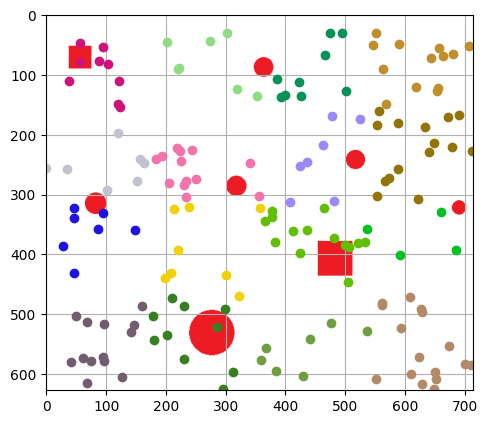

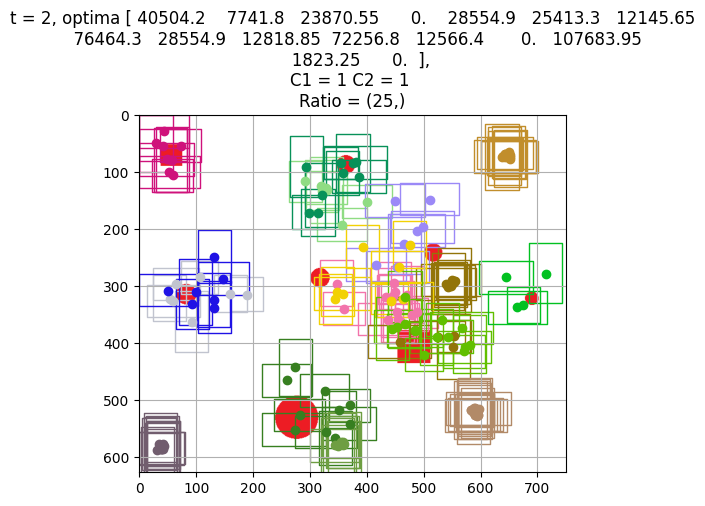

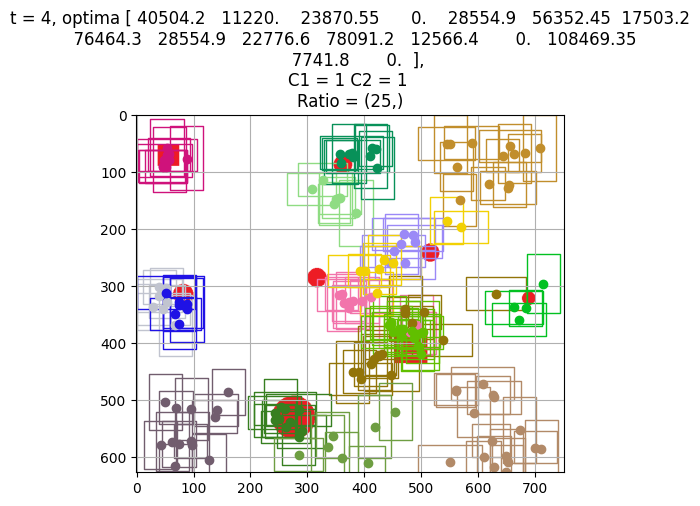

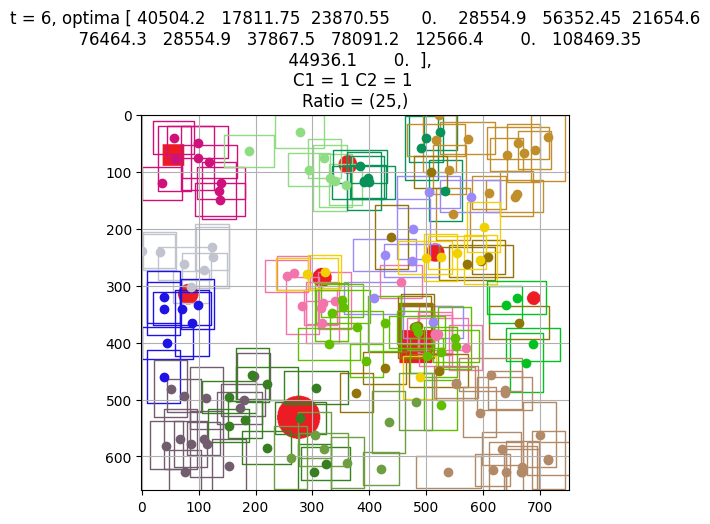

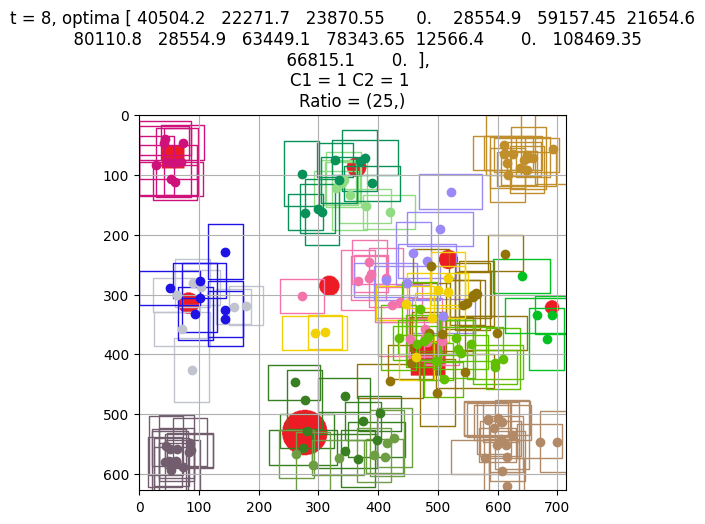

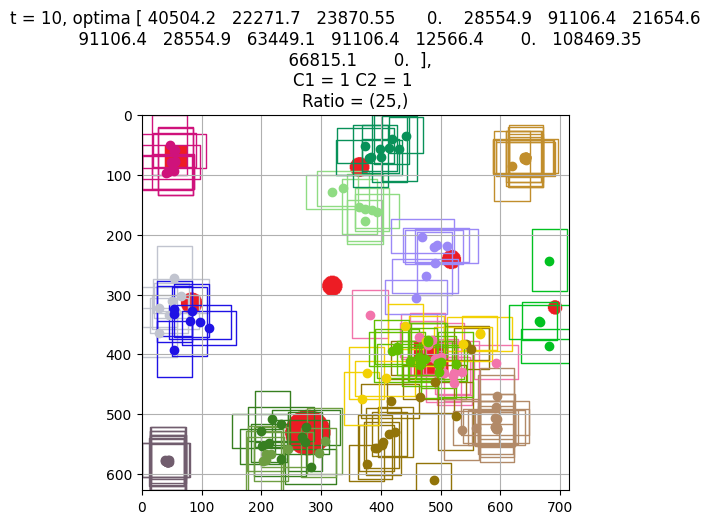

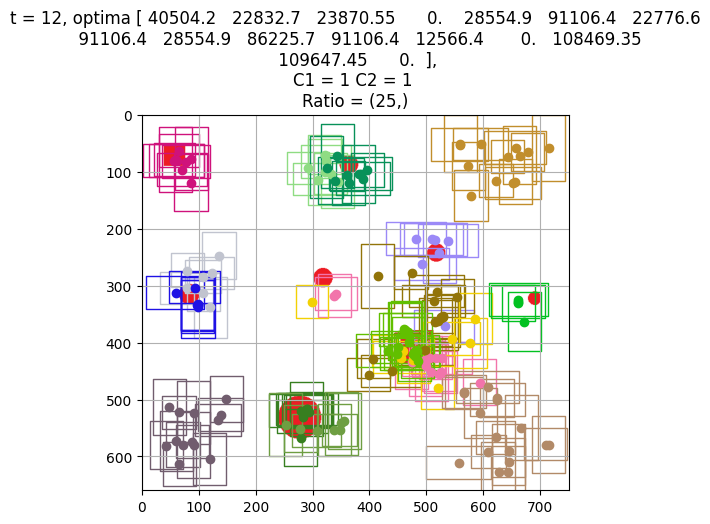

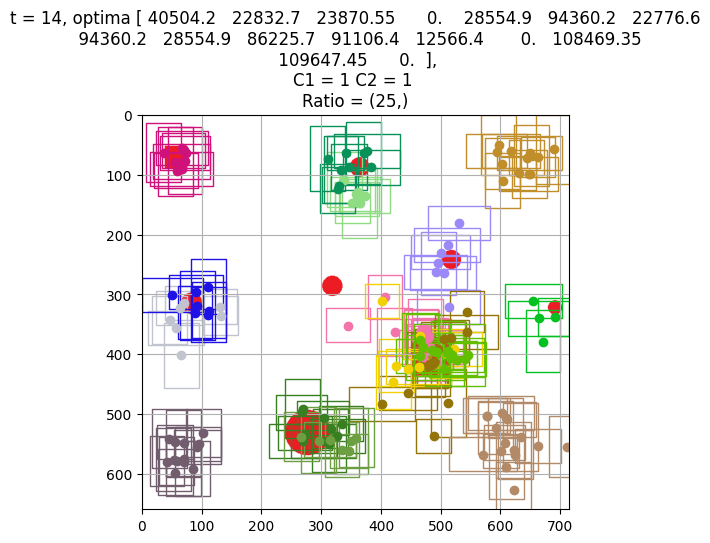

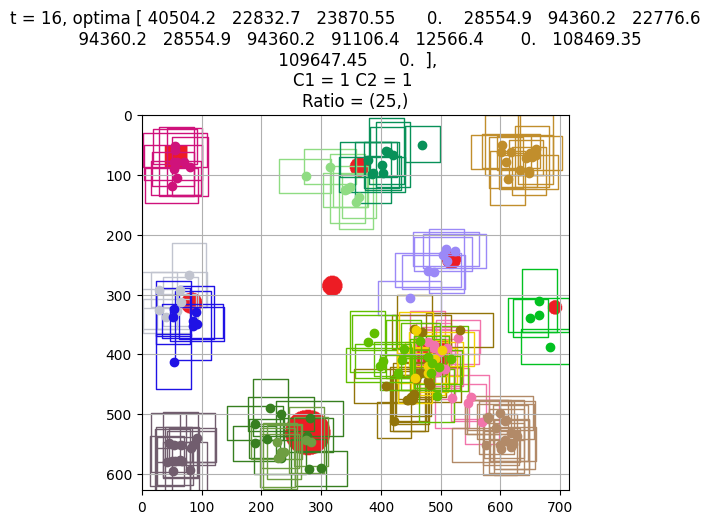

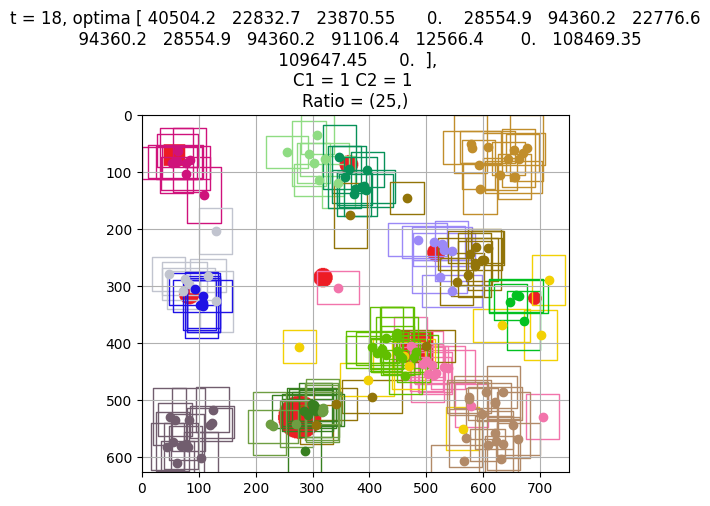

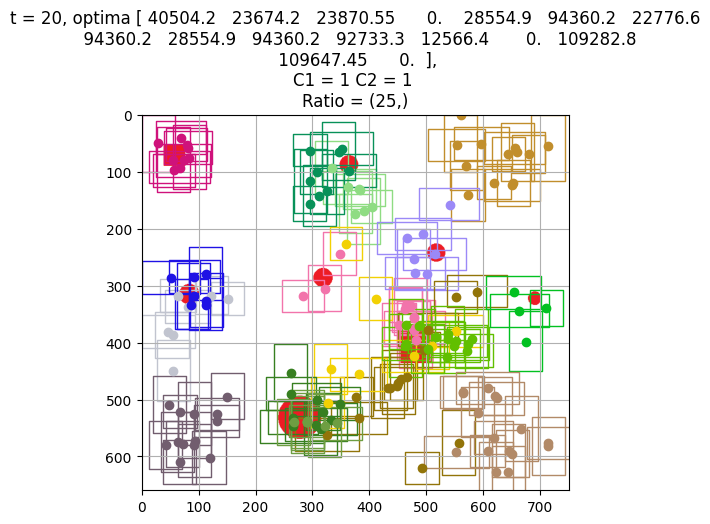

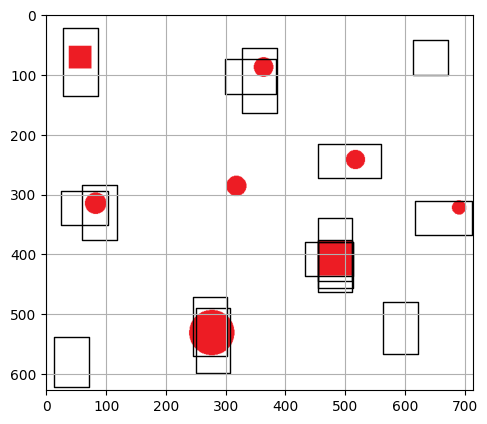

In [11]:
# for i in range(6):
gbest_val, gbest, boxes = testAgain16(imageArray1)


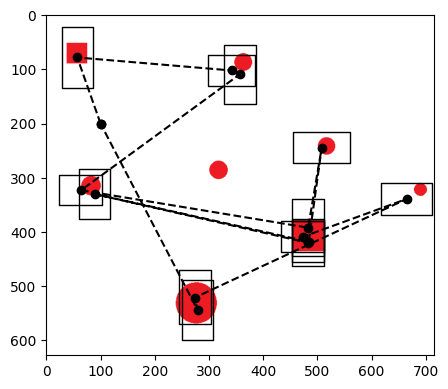

In [29]:
box = boxes[gbest_val[20] != 0]
shape = gbest_val[20,gbest_val[20] != 0].shape[0]

path_point = np.zeros((shape,3), dtype='int32')
radius = np.zeros((shape,2), dtype='int32')
radius[...,1] = np.array([i for i in range(radius.shape[0])])

path_plan = np.zeros((shape,4), dtype='int32')
path_plan[...,0] = gbest_val[20,gbest_val[20] != 0]
path_plan[...,1] = gbest[20,gbest_val[20] != 0,0]
path_plan[...,2] = gbest[20,gbest_val[20] != 0 ,1]
path_plan[...,3] = radius[...,1]

start_pointX = 100
start_pointY = 200

start_point = np.array([start_pointX, start_pointY], dtype='int')
back_point = start_point

path_point[0,0] = start_point[0]
path_point[0,1] = start_point[1]
path_point[shape-1,0] = back_point[0]
path_point[shape-1,1] = back_point[1]

# radius[...,0] = (start_point[0]-path_plan[...,1])**2+(start_point[1]-path_plan[..., 2])**2


for j in range(shape):
#         # gunakan rumu pythagoras
        radius[...,0] = (start_point[0]-path_plan[...,1])**2+(start_point[1]-path_plan[..., 2])**2
        radius[...,0] = [sqrt(radius[i,0]) for i in range(radius.shape[0])]
#         # urutkan berdasarkan jarak terdekat
        # radius = radius[radius[...,0].argsort()]
        # print(radius[0,1])
        # print(path_plan)
        # print(np.where(path_plan[...,3] == radius[0,1])[0][0])

        path_point[j,0] = path_plan[np.where(path_plan[:,3] == radius[0,1])[0][0],1]
        path_point[j,1] = path_plan[np.where(path_plan[:,3] == radius[0,1])[0][0],2]
        path_point[j,2] = radius[0,0]
        
        start_point = gbest[20,radius[0,1]]
        path_plan = np.delete(path_plan ,[np.where(path_plan == radius[0,1])[0][0]] ,axis=0)
        radius = np.delete(radius, [0], axis=0)
        radius = radius[radius[...,1].argsort()]

start_point = np.array([start_pointX, start_pointY], dtype='int')

final_point = np.zeros((shape+2,2))

final_point[0] = start_point
final_point[shape+1] = back_point 
final_point[1:shape+1] = path_point[:,:2]
img = cv2.imread(imageArray1[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(((path_point[:,0].flatten()-(img.shape[1]/2))/100, (path_point[:,1].flatten()-(img.shape[0]/2))/100))

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img)
ax.plot(final_point[:,0], final_point[:,1], linestyle='dashed', color='black')
ax.plot(final_point[:,0], final_point[:,1], 'o', color='black')
dimensi_gbest(ax, box[:,0], box[:,1], box[:,2], box[:,3], edgeColor='black')


In [13]:
# lower1 = np.array([0,100,100])
# upper1 = np.array([10,255,255])
# lower2 = np.array([160,100,100])
# upper2 = np.array([179,255,255])

# greenLow = np.array([25,50,100])
# greenUp = np.array([75,255,255])

# upper_mask = cv2.inRange(imgHSV, lower2, upper2)
# lower_mask = cv2.inRange(imgHSV, lower1, upper1)

# green_mask = cv2.inRange(imgHSV, greenLow, greenUp)

# full_mask = upper_mask + lower_mask

# result = cv2.bitwise_and(imgRGB, imgRGB, mask=full_mask)
# resultGreen = cv2.bitwise_and(imgRGB, imgRGB, mask=green_mask)
# # print(np.sum(upper_mask))

# fig, ax = plt.subplots(1,3,figsize=(5,5))
# ax[0].imshow(result)
# ax[1].imshow(resultGreen)
# ax[2].imshow(imgRGB)

In [14]:

# for m in range(3):
#     partikel = 80
#     dimensi = 2 

#     c1 = 0.5
#     c2 = 0.5
#     w = 0.5
#     n = 16


#     # konversi ke integer
#     x_pos = np.zeros((dimensi, partikel), dtype='int32')
#     x = np.random.randint(0,img.shape[1],(partikel), dtype='int32')
#     y = np.random.randint(0,img.shape[0],(partikel), dtype='int32')

#     x_pos[0] = x
#     x_pos[1] = y

#     # inisiasi region
#     reg1 = x_pos[:,(x_pos[0]<img.shape[1]/2) * (x_pos[1] < img.shape[0]/2)] 
#     reg2 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[1] < img.shape[0]/2)] 
#     reg3 = x_pos[:,(x_pos[0]<img.shape[1]/2) * (x_pos[1] > img.shape[0]/2)] 
#     reg4 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[1] > img.shape[0]/2)] 

#     gbest1 = np.zeros((n,dimensi), dtype='int32')
#     gbest_val1 = np.zeros((n), dtype='int32')

#     gbest2 = np.zeros((n,dimensi), dtype='int32')
#     gbest_val2 = np.zeros((n), dtype='int32')

#     gbest3 = np.zeros((n,dimensi), dtype='int32')
#     gbest_val3 = np.zeros((n), dtype='int32')

#     gbest4 = np.zeros((n,dimensi), dtype='int32')
#     gbest_val4 = np.zeros((n), dtype='int32')

#     # inisiasi size
#     size = np.mean(img.shape)/25

#     # inisiasi random size tiap region
#     rand_size1 = np.random.rand(reg1.shape[1])
#     rand_size2 = np.random.rand(reg2.shape[1])
#     rand_size3 = np.random.rand(reg3.shape[1])
#     rand_size4 = np.random.rand(reg4.shape[1])

#     ukuran_partikel1 = ((rand_size1+size)*2).astype(int)
#     ukuran_partikel2 = ((rand_size2+size)*2).astype(int)
#     ukuran_partikel3 = ((rand_size3+size)*2).astype(int)
#     ukuran_partikel4 = ((rand_size4+size)*2).astype(int)

#     # window
#     window1 = np.zeros((dimensi,reg1.shape[1]))
#     window2 = np.zeros((dimensi,reg2.shape[1]))
#     window3 = np.zeros((dimensi,reg3.shape[1]))
#     window4 = np.zeros((dimensi,reg4.shape[1]))

#     for k in range(reg1.shape[1]):
#         if rand_size1[k] < .5:
#             window1[0,k] = (1 + np.random.rand(1))*ukuran_partikel1[k]
#             window1[1,k] = ukuran_partikel1[k]
#         else:
#             window1[0,k] = ukuran_partikel1[k]
#             window1[1,k] = (1 + np.random.rand(1))*ukuran_partikel1[k]
#     for k in range(reg2.shape[1]):
#         if rand_size2[k] < .5:
#             window2[0,k] = (1 + np.random.rand(1))*ukuran_partikel2[k]
#             window2[1,k] = ukuran_partikel2[k]
#         else:
#             window2[0,k] = ukuran_partikel2[k]
#             window2[1,k] = (1 + np.random.rand(1))*ukuran_partikel2[k]
#     for k in range(reg3.shape[1]):
#         if rand_size3[k] < .5:
#             window3[0,k] = (1 + np.random.rand(1))*ukuran_partikel3[k]
#             window3[1,k] = ukuran_partikel3[k]
#         else:
#             window3[0,k] = ukuran_partikel3[k]
#             window3[1,k] = (1 + np.random.rand(1))*ukuran_partikel3[k]
#     for k in range(reg4.shape[1]):
#         if rand_size4[k] < .5:
#             window4[0,k] = (1 + np.random.rand(1))*ukuran_partikel4[k]
#             window4[1,k] = ukuran_partikel4[k]
#         else:
#             window4[0,k] = ukuran_partikel4[k]
#             window4[1,k] = (1 + np.random.rand(1))*ukuran_partikel4[k]

#     v1 = np.random.rand(dimensi,reg1.shape[1])
#     v2 = np.random.rand(dimensi,reg2.shape[1])
#     v3 = np.random.rand(dimensi,reg3.shape[1])
#     v4 = np.random.rand(dimensi,reg4.shape[1])

#     startPos1 = np.zeros((dimensi,reg1.shape[1]), dtype='int32')
#     startPos2 = np.zeros((dimensi,reg2.shape[1]), dtype='int32')
#     startPos3 = np.zeros((dimensi,reg3.shape[1]), dtype='int32')
#     startPos4 = np.zeros((dimensi,reg4.shape[1]), dtype='int32')

#     pbest_val1, reg1, startPos1 = fitSum(reg1[0], reg1[1], img, window1[1], window1[0])
#     pbest1 = reg1 # posisi pbest awal

#     pbest_val2, reg2, startPos2 = fitSum(reg2[0], reg2[1], img, window2[1], window2[0])
#     pbest2 = reg2 # posisi pbest awal

#     pbest_val3, reg3, startPos3 = fitSum(reg3[0], reg3[1], img, window3[1], window3[0])
#     pbest3 = reg3 # posisi pbest awal

#     pbest_val4, reg4, startPos4 = fitSum(reg4[0], reg4[1], img, window4[1], window4[0])
#     pbest4 = reg4 # posisi pbest awal

#     index = np.array([pbest_val1.argmax(),pbest_val2.argmax(),pbest_val3.argmax(),pbest_val4.argmax()])

#     gbest1[0] = pbest1[:,index[0]]
#     gbest_val1[0] = pbest_val1.max()

#     gbest2[0] = pbest2[:,index[1]]
#     gbest_val2[0] = pbest_val2.max()

#     gbest3[0] = pbest3[:,index[2]]
#     gbest_val3[0] = pbest_val3.max()

#     gbest4[0] = pbest4[:,index[3]]
#     gbest_val4[0] = pbest_val4.max()

#     for j in range(1,n):
#         r1 = np.random.rand()
#         r2 = np.random.rand()
                
#         # atur nilai kecepatan dan posisi
#         v1 = w + v1 + (c1*r1*(pbest1-reg1))+(c2*r2*(gbest1[j-1].reshape(-1,1)-reg1))
#         v2 = w + v2 + (c1*r1*(pbest2-reg2))+(c2*r2*(gbest2[j-1].reshape(-1,1)-reg2))
#         v3 = w + v3 + (c1*r1*(pbest3-reg3))+(c2*r2*(gbest3[j-1].reshape(-1,1)-reg3))
#         v4 = w + v4 + (c1*r1*(pbest4-reg4))+(c2*r2*(gbest4[j-1].reshape(-1,1)-reg4))
#         reg1 = (reg1+v1).astype(int)
#         reg2 = (reg2+v2).astype(int)
#         reg3 = (reg3+v3).astype(int)
#         reg4 = (reg4+v4).astype(int)
#         # x_pos = x_pos.astype(int)
#         reg1[reg1<0] = reg1[reg1<0] + abs(reg1[reg1<0])
#         reg2[reg2<0] = reg2[reg2<0] + abs(reg2[reg2<0])
#         reg3[reg3<0] = reg3[reg3<0] + abs(reg3[reg3<0])
#         reg4[reg4<0] = reg4[reg4<0] + abs(reg4[reg4<0])
        

#         # masukkan nilai pbest baru
#         fitness1, reg1, startPos1 = fitSum(reg1[0], reg1[1], img, window1[0], window1[1])
#         fitness2, reg2, startPos2 = fitSum(reg2[0], reg2[1], img, window2[0], window2[1])
#         fitness3, reg3, startPos3 = fitSum(reg3[0], reg3[1], img, window3[0], window3[1])
#         fitness4, reg4, startPos4 = fitSum(reg4[0], reg4[1], img, window4[0], window4[1])
#         # print(x_pos)

#         pbest1[:,(pbest_val1 > fitness1)] = pbest1[:,(pbest_val1 > fitness1)]
#         pbest1[:,(fitness1 > pbest_val1)] = reg1[:,(fitness1 > pbest_val1)]
        
#         pbest2[:,(pbest_val2 > fitness2)] = pbest2[:,(pbest_val2 > fitness2)]
#         pbest2[:,(fitness2 > pbest_val2)] = reg2[:,(fitness2 > pbest_val2)]
        
#         pbest3[:,(pbest_val3 > fitness3)] = pbest3[:,(pbest_val3 > fitness3)]
#         pbest3[:,(fitness3 > pbest_val3)] = reg3[:,(fitness3 > pbest_val3)]
        
#         pbest4[:,(pbest_val4 > fitness4)] = pbest4[:,(pbest_val4 > fitness4)]
#         pbest4[:,(fitness4 > pbest_val4)] = reg4[:,(fitness4 > pbest_val4)]
                
#         pbest_val1 = np.array([pbest_val1, fitness1]).max(axis=0)
#         pbest_val2 = np.array([pbest_val2, fitness2]).max(axis=0)
#         pbest_val3 = np.array([pbest_val3, fitness3]).max(axis=0)
#         pbest_val4 = np.array([pbest_val4, fitness4]).max(axis=0)
#         # set index nilai terbesar
#         index = np.array([pbest_val1.argmax(),pbest_val2.argmax(),pbest_val3.argmax(),pbest_val4.argmax()])

#         gbest1[j] = pbest1[...,index[0]]
#         gbest_val1[j] = pbest_val1.max()
        
#         gbest2[j] = pbest2[...,index[1]]
#         gbest_val2[j] = pbest_val2.max()
        
#         gbest3[j] = pbest3[...,index[2]]
#         gbest_val3[j] = pbest_val3.max()
        
#         gbest4[j] = pbest4[...,index[3]]
#         gbest_val4[j] = pbest_val4.max()

#         if j%2==0:
#             fig, ax = plt.subplots(figsize=(10,10))
#             fig.tight_layout()
#             ax.imshow(img)
#             ax.plot(reg1[0], reg1[1], 'o', color='black')
#             ax.plot(reg2[0], reg2[1], 'o', color='black')
#             ax.plot(reg3[0], reg3[1], 'o', color='black')
#             ax.plot(reg4[0], reg4[1], 'o', color='black')
#             # ax.set_title(f't = {j}, optima {gbest_val[j]}, \ngbest {gbest[j]}')
#             dimensi_partikel(ax, startPos1[0], startPos1[1], window1[0], window1[1], edgeColor='black')
#             dimensi_partikel(ax, startPos2[0], startPos2[1], window2[0], window2[1], edgeColor='black')
#             dimensi_partikel(ax, startPos3[0], startPos3[1], window3[0], window3[1], edgeColor='black')
#             dimensi_partikel(ax, startPos4[0], startPos4[1], window4[0], window4[1], edgeColor='black')

#     fig, ax = plt.subplots(figsize=(5,5))
#     fig.tight_layout()
#     ax.imshow(img)
#     ax.plot(gbest1[n-1,0], gbest1[n-1:,1], 'o', color='black')
#     ax.plot(gbest2[n-1,0], gbest2[n-1:,1], 'o', color='black')
#     ax.plot(gbest3[n-1,0], gbest3[n-1:,1], 'o', color='black')
#     ax.plot(gbest4[n-1,0], gbest4[n-1:,1], 'o', color='black')



In [15]:


# for z in range(4):
#     partikel = 80
#     dimensi = 2 

#     c1 = .5
#     c2 = .5
#     w = 0.5
#     n = 10


#     # konversi ke integer
#     x_pos = np.zeros((dimensi, partikel), dtype='int32')
#     x = np.random.randint(0,img.shape[1],(partikel), dtype='int32')
#     y = np.random.randint(0,img.shape[0],(partikel), dtype='int32')

#     x_pos[0] = x
#     x_pos[1] = y

#     # inisiasi region
#     reg1 = x_pos[:,(x_pos[0]<img.shape[1]/2) * (x_pos[1] < img.shape[0]/2)] 
#     reg2 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[1] < img.shape[0]/2)] 
#     reg3 = x_pos[:,(x_pos[0]<img.shape[1]/2) * (x_pos[1] > img.shape[0]/2)] 
#     reg4 = x_pos[:,(x_pos[0]>img.shape[1]/2) * (x_pos[1] > img.shape[0]/2)] 

#     gbest1 = np.zeros((n,dimensi), dtype='int32')
#     gbest_val1 = np.zeros((n), dtype='int32')

#     gbest2 = np.zeros((n,dimensi), dtype='int32')
#     gbest_val2 = np.zeros((n), dtype='int32')

#     gbest3 = np.zeros((n,dimensi), dtype='int32')
#     gbest_val3 = np.zeros((n), dtype='int32')

#     gbest4 = np.zeros((n,dimensi), dtype='int32')
#     gbest_val4 = np.zeros((n), dtype='int32')

#     # inisiasi size
#     size = np.mean(img.shape)/30

#     # inisiasi random size tiap region
#     rand_size1 = np.random.rand(reg1.shape[1])
#     rand_size2 = np.random.rand(reg2.shape[1])
#     rand_size3 = np.random.rand(reg3.shape[1])
#     rand_size4 = np.random.rand(reg4.shape[1])

#     ukuran_partikel1 = ((rand_size1+size)*2).astype(int)
#     ukuran_partikel2 = ((rand_size2+size)*2).astype(int)
#     ukuran_partikel3 = ((rand_size3+size)*2).astype(int)
#     ukuran_partikel4 = ((rand_size4+size)*2).astype(int)

#     # window
#     window1 = np.zeros((dimensi,reg1.shape[1]))
#     window2 = np.zeros((dimensi,reg2.shape[1]))
#     window3 = np.zeros((dimensi,reg3.shape[1]))
#     window4 = np.zeros((dimensi,reg4.shape[1]))

#     for k in range(reg1.shape[1]):
#         if rand_size1[k] < .5:
#             window1[0,k] = (1 + np.random.rand(1))*ukuran_partikel1[k]
#             window1[1,k] = ukuran_partikel1[k]
#         else:
#             window1[0,k] = ukuran_partikel1[k]
#             window1[1,k] = (1 + np.random.rand(1))*ukuran_partikel1[k]
#     for k in range(reg2.shape[1]):
#         if rand_size2[k] < .5:
#             window2[0,k] = (1 + np.random.rand(1))*ukuran_partikel2[k]
#             window2[1,k] = ukuran_partikel2[k]
#         else:
#             window2[0,k] = ukuran_partikel2[k]
#             window2[1,k] = (1 + np.random.rand(1))*ukuran_partikel2[k]
#     for k in range(reg3.shape[1]):
#         if rand_size3[k] < .5:
#             window3[0,k] = (1 + np.random.rand(1))*ukuran_partikel3[k]
#             window3[1,k] = ukuran_partikel3[k]
#         else:
#             window3[0,k] = ukuran_partikel3[k]
#             window3[1,k] = (1 + np.random.rand(1))*ukuran_partikel3[k]
#     for k in range(reg4.shape[1]):
#         if rand_size4[k] < .5:
#             window4[0,k] = (1 + np.random.rand(1))*ukuran_partikel4[k]
#             window4[1,k] = ukuran_partikel4[k]
#         else:
#             window4[0,k] = ukuran_partikel4[k]
#             window4[1,k] = (1 + np.random.rand(1))*ukuran_partikel4[k]

#     v1 = np.random.rand(dimensi,reg1.shape[1])
#     v2 = np.random.rand(dimensi,reg2.shape[1])
#     v3 = np.random.rand(dimensi,reg3.shape[1])
#     v4 = np.random.rand(dimensi,reg4.shape[1])

#     startPos1 = np.zeros((dimensi,reg1.shape[1]), dtype='int32')
#     startPos2 = np.zeros((dimensi,reg2.shape[1]), dtype='int32')
#     startPos3 = np.zeros((dimensi,reg3.shape[1]), dtype='int32')
#     startPos4 = np.zeros((dimensi,reg4.shape[1]), dtype='int32')

#     pbest_val1, reg1, startPos1 = fitSum(reg1[0], reg1[1], img, window1[1], window1[0])
#     pbest1 = reg1 # posisi pbest awal

#     pbest_val2, reg2, startPos2 = fitSum(reg2[0], reg2[1], img, window2[1], window2[0])
#     pbest2 = reg2 # posisi pbest awal

#     pbest_val3, reg3, startPos3 = fitSum(reg3[0], reg3[1], img, window3[1], window3[0])
#     pbest3 = reg3 # posisi pbest awal

#     pbest_val4, reg4, startPos4 = fitSum(reg4[0], reg4[1], img, window4[1], window4[0])
#     pbest4 = reg4 # posisi pbest awal

#     index = np.array([pbest_val1.argmax(),pbest_val2.argmax(),pbest_val3.argmax(),pbest_val4.argmax()])

#     gbest1[0] = pbest1[:,index[0]]
#     gbest_val1[0] = pbest_val1.max()

#     gbest2[0] = pbest2[:,index[1]]
#     gbest_val2[0] = pbest_val2.max()

#     gbest3[0] = pbest3[:,index[2]]
#     gbest_val3[0] = pbest_val3.max()

#     gbest4[0] = pbest4[:,index[3]]
#     gbest_val4[0] = pbest_val4.max()

#     for j in range(1,n):
#         r1 = np.random.rand()
#         r2 = np.random.rand()
                
#         # atur nilai kecepatan dan posisi
#         v1 = w + v1 + (c1*r1*(pbest1-reg1))+(c2*r2*(gbest1[j-1].reshape(-1,1)-reg1))
#         v2 = w + v2 + (c1*r1*(pbest2-reg2))+(c2*r2*(gbest2[j-1].reshape(-1,1)-reg2))
#         v3 = w + v3 + (c1*r1*(pbest3-reg3))+(c2*r2*(gbest3[j-1].reshape(-1,1)-reg3))
#         v4 = w + v4 + (c1*r1*(pbest4-reg4))+(c2*r2*(gbest4[j-1].reshape(-1,1)-reg4))
#         reg1 = (reg1+v1).astype(int)
#         reg2 = (reg2+v2).astype(int)
#         reg3 = (reg3+v3).astype(int)
#         reg4 = (reg4+v4).astype(int)
#         # x_pos = x_pos.astype(int)
#         reg1[reg1<0] = reg1[reg1<0] + abs(reg1[reg1<0])
#         reg2[reg2<0] = reg2[reg2<0] + abs(reg2[reg2<0])
#         reg3[reg3<0] = reg3[reg3<0] + abs(reg3[reg3<0])
#         reg4[reg4<0] = reg4[reg4<0] + abs(reg4[reg4<0])
        

#         # masukkan nilai pbest baru
#         fitness1, reg1, startPos1 = fitSum(reg1[0], reg1[1], img, window1[0], window1[1])
#         fitness2, reg2, startPos2 = fitSum(reg2[0], reg2[1], img, window2[0], window2[1])
#         fitness3, reg3, startPos3 = fitSum(reg3[0], reg3[1], img, window3[0], window3[1])
#         fitness4, reg4, startPos4 = fitSum(reg4[0], reg4[1], img, window4[0], window4[1])
#         # print(x_pos)

#         pbest1[:,(pbest_val1 > fitness1)] = pbest1[:,(pbest_val1 > fitness1)]
#         pbest1[:,(fitness1 > pbest_val1)] = reg1[:,(fitness1 > pbest_val1)]
        
#         pbest2[:,(pbest_val2 > fitness2)] = pbest2[:,(pbest_val2 > fitness2)]
#         pbest2[:,(fitness2 > pbest_val2)] = reg2[:,(fitness2 > pbest_val2)]
        
#         pbest3[:,(pbest_val3 > fitness3)] = pbest3[:,(pbest_val3 > fitness3)]
#         pbest3[:,(fitness3 > pbest_val3)] = reg3[:,(fitness3 > pbest_val3)]
        
#         pbest4[:,(pbest_val4 > fitness4)] = pbest4[:,(pbest_val4 > fitness4)]
#         pbest4[:,(fitness4 > pbest_val4)] = reg4[:,(fitness4 > pbest_val4)]
                
#         pbest_val1 = np.array([pbest_val1, fitness1]).max(axis=0)
#         pbest_val2 = np.array([pbest_val2, fitness2]).max(axis=0)
#         pbest_val3 = np.array([pbest_val3, fitness3]).max(axis=0)
#         pbest_val4 = np.array([pbest_val4, fitness4]).max(axis=0)
#         # set index nilai terbesar
#         index = np.array([pbest_val1.argmax(),pbest_val2.argmax(),pbest_val3.argmax(),pbest_val4.argmax()])

#         gbest1[j] = pbest1[...,index[0]]
#         gbest_val1[j] = pbest_val1.max()
        
#         gbest2[j] = pbest2[...,index[1]]
#         gbest_val2[j] = pbest_val2.max()
        
#         gbest3[j] = pbest3[...,index[2]]
#         gbest_val3[j] = pbest_val3.max()
        
#         gbest4[j] = pbest4[...,index[3]]
#         gbest_val4[j] = pbest_val4.max()

#         if j%2==0:
#             fig, ax = plt.subplots(figsize=(10,10))
#             fig.tight_layout()
#             ax.imshow(img)
#             ax.plot(reg1[0], reg1[1], 'o', color='black')
#             ax.plot(reg2[0], reg2[1], 'o', color='black')
#             ax.plot(reg3[0], reg3[1], 'o', color='black')
#             ax.plot(reg4[0], reg4[1], 'o', color='black')
#             # ax.set_title(f't = {j}, optima {gbest_val[j]}, \ngbest {gbest[j]}')
#             dimensi_partikel(ax, startPos1[0], startPos1[1], window1[0], window1[1], edgeColor='black')
#             dimensi_partikel(ax, startPos2[0], startPos2[1], window2[0], window2[1], edgeColor='black')
#             dimensi_partikel(ax, startPos3[0], startPos3[1], window3[0], window3[1], edgeColor='black')
#             dimensi_partikel(ax, startPos4[0], startPos4[1], window4[0], window4[1], edgeColor='black')

#     fig, ax = plt.subplots(figsize=(5,5))
#     fig.tight_layout()
#     ax.imshow(img)
#     ax.plot(gbest1[n-1,0], gbest1[n-1,1], 'o', color='black')
#     ax.plot(gbest2[n-1,0], gbest2[n-1,1], 'o', color='black')
#     ax.plot(gbest3[n-1,0], gbest3[n-1,1], 'o', color='black')
#     ax.plot(gbest4[n-1,0], gbest4[n-1,1], 'o', color='black')



In [16]:

# for m in range(1):
#     partikel = 20
#     dimensi = 2 

#     c1 = .5
#     c2 = .5
#     w = 0.5
#     n = 20

#     gbest = np.zeros((n,dimensi), dtype='int32')
#     gbest_val = np.zeros((n), dtype='int32')

#     # konversi ke integer
#     x_pos = np.zeros((dimensi, partikel), dtype='int32')
#     x = np.random.randint(0,img.shape[1],(partikel), dtype='int32')
#     y = np.random.randint(0,img.shape[0],(partikel), dtype='int32')

#     x_pos[0] = x
#     x_pos[1] = y
        
#     # membuat ukuran dimensi partikel
#     size = np.mean(img.shape)/25
#     rand_size = np.random.rand(partikel)

#     # ukuran window random awal
#     ukuran_partikel = ((rand_size+size)*2).astype(int)

#     # array untuk window
#     windowX = np.zeros((partikel))
#     windowY = np.zeros((partikel))

#     # generate nilai window dengan random
#     for k in range(partikel):
#         if rand_size[k] < .5:
#             windowX[k] = (1 + np.random.rand(1))*ukuran_partikel[k]
#             windowY[k] = ukuran_partikel[k]
#         else:
#             windowX[k] = ukuran_partikel[k]
#             windowY[k] = (1 + np.random.rand(1))*ukuran_partikel[k]

#     # merubah window jadi bentuk integer
#     windowY = windowY.astype(int)
#     windowX = windowX.astype(int)

#     startX = abs(x_pos[0]-(1/2*windowX)).astype(int)
#     startY = abs(x_pos[1]-(1/2*windowY)).astype(int)

#     startX[(x_pos[0]-(1/2*windowX)).astype(int) <= 0] = 0
#     startY[(x_pos[1]-(1/2*windowY)).astype(int) <= 0] = 0

#     endY = abs(startY + windowY).astype(int)#titik ujung y window
#     endX = abs(startX + windowX).astype(int) #titik ujung x window

#     # fig, ax = plt.subplots(figsize=(5,5))
#     # fig.tight_layout()
#     # ax.plot(x, y, 'o', color='black')
#     # ax.imshow(img)
#     # dimensi_partikel(ax, startX, startY, windowX, windowY, edgeColor='black')

#     # inisialisasi kecepatan pastikel secara random
#     v = np.random.rand(dimensi,partikel)

#     # nilai pbest
#     startPos = np.zeros((dimensi,partikel), dtype='int32')
#     # nilai gbest
#     pbest_val, x_pos, startPos = fitSum(x, y, img, windowX, windowY)
#     pbest = x_pos # posisi pbest awal


#     # temukan index di mana nilai optima ada pada pbest
#     index = pbest_val.argmax()

#     # isi gbest dengan nilai posisi partike, dan gbest val untuk nilai fitness pada partikel spesifik
#     gbest[0] = pbest[:,index]
#     gbest_val[0] = pbest_val.max()

#     # distance
#     distance = np.zeros((n-1), dtype='int32')
        
#     for j in range(1,n):
#     # atur nilai random
#         r1 = np.random.rand()
#         r2 = np.random.rand()
            
#         # atur nilai kecepatan dan posisi
#         v = w + v + (c1*r1*(pbest-x_pos))+(c2*r2*(gbest[j-1].reshape(-1,1)-x_pos))
#         x_pos = (x_pos+v)
#         x_pos = x_pos.astype(int)
#         x_pos[x_pos<0] = x_pos[x_pos<0] + abs(x_pos[x_pos<0])
    
#         x_int = x_pos[0]
#         y_int = x_pos[1]

#         # masukkan nilai pbest baru
#         fitness, x_pos, startPos = fitSum(x_int, y_int, img, windowX, windowY)
#         # print(x_pos)

#         pbest[:,(pbest_val > fitness)] = pbest[:,(pbest_val > fitness)]
#         pbest[:,(fitness > pbest_val)] = x_pos[:,(fitness > pbest_val)]
            
#         pbest_val = np.array([pbest_val, fitness]).max(axis=0)
#         # set index nilai terbesar
#         index = pbest_val.argmax()

#         # atur nilai gbest agar tetap jika pbest value tidak berubah

#         # set gbest baru
#         gbest[j] = pbest[...,index]
#         gbest_val[j] = pbest_val.max()

#         # distance gbest and particle
#         distance_sqrt = np.array([sqrt((gbest[j-1,0]-x_pos[0,i])**2 + (gbest[j-1,1]-x_pos[1,i])**2) for i in range(partikel)])
#         distance_mean = distance_sqrt.mean()
#         distance[j-1] = distance_mean.astype(int)

#         # if j%2==0:
#             # fig, ax = plt.subplots(figsize=(10,10))
#             # fig.tight_layout()
#             # ax.imshow(img)
#             # ax.plot(x_pos[0], x_pos[1], 'o', color='black')
#             # ax.set_title(f't = {j}, optima {gbest_val[j]}, \ngbest {gbest[j]}')
#             # dimensi_partikel(ax, startPos[0], startPos[1], windowX, windowY, edgeColor='black')
#             # ax[1].set_title(f'Fitness Value = {gbest_val[j]}')
#             # barplot = ax[1].bar(range(partikel), pbest_val)
#             # ax[1].bar_label(barplot, labels=pbest_val/1000, label_type='edge')
#             # ax[2].set_title(f'Fitness Value = {fitness.max()}')
#             # barplot = ax[2].bar(range(partikel), fitness)
#             # ax[2].bar_label(barplot, labels=fitness/1000, label_type='edge')
#             # ax[1].imshow(imgArray[0])
#             # ax[1].plot(gbest[j,0], gbest[j,1], 'o', color='black')
#     fig, ax = plt.subplots(figsize=(5,5))
#     fig.tight_layout()
#     ax.imshow(img)
#     ax.plot(gbest[n-1,0], gbest[n-1:,1], 'o', color='black')
# #     print(distance)


In [17]:
# fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(img)
# ax.plot(gbest[:,4,0], gbest[:,4,1], 'o', color='black')


# dimensi_partikel(ax, bestWindowX[:,0], bestWindowY[:,0], bestWindowX[:,1], bestWindowY[:,1], edgeColor='black')

In [18]:
# bikin fungsi yang menguji PSO dengan input array C1, C2, iterasi, jumlah partikel

# def test(window_size,C1=np.array([0.5,1,2]), C2=np.array([0.5,1,2]), iterasi=20, partikel=5):
#     for I1 in zip(C1):
#         for I2 in zip(C2):
#             for ratio_size in zip(window_size):    
#                 dimensi = 2 

#                 c1 = I1[0]
#                 c2 = I2[0]

#                 w = 0
#                 n = iterasi

#                 gbest = np.zeros((n,dimensi), dtype='int32')
#                 gbest_val = np.zeros((n), dtype='int32')

#                 # konversi ke integer
#                 x_pos = np.zeros((dimensi, partikel), dtype='int32')
#                 x = np.random.randint(0,img.shape[1],(partikel), dtype='int32')
#                 y = np.random.randint(0,img.shape[0],(partikel), dtype='int32')

#                 x_pos[0] = x
#                 x_pos[1] = y
                    
#                 # membuat ukuran dimensi partikel
#                 size = np.mean(img.shape)/ratio_size
#                 rand_size = np.random.rand(partikel)

#                 # ukuran window random awal
#                 ukuran_partikel = ((rand_size+size)*2).astype(int)

#                 # array untuk window
#                 windowX = np.zeros((partikel))
#                 windowY = np.zeros((partikel))

#                 # generate nilai window dengan random
#                 for k in range(partikel):
#                     if rand_size[k] < .5:
#                         windowX[k] = (1 + np.random.rand(1))*ukuran_partikel[k]
#                         windowY[k] = ukuran_partikel[k]
#                     else:
#                         windowX[k] = ukuran_partikel[k]
#                         windowY[k] = (1 + np.random.rand(1))*ukuran_partikel[k]

#                 # merubah window jadi bentuk integer
#                 windowY = windowY.astype(int)
#                 windowX = windowX.astype(int)

#                 startX = abs(x_pos[0]-(1/2*windowX)).astype(int)
#                 startY = abs(x_pos[1]-(1/2*windowY)).astype(int)

#                 startX[(x_pos[0]-(1/2*windowX)).astype(int) <= 0] = 0
#                 startY[(x_pos[1]-(1/2*windowY)).astype(int) <= 0] = 0

#                 endY = abs(startY + windowY).astype(int)#titik ujung y window
#                 endX = abs(startX + windowX).astype(int) #titik ujung x window

#                 # fig, ax = plt.subplots(figsize=(5,5))
#                 # fig.tight_layout()
#                 # ax.plot(x, y, 'o', color='black')
#                 # ax.imshow(img)
#                 # dimensi_partikel(ax, startX, startY, windowX, windowY, edgeColor='black')

#                 # inisialisasi kecepatan pastikel secara random
#                 v = np.random.rand(dimensi,partikel)

#                 # distance 
#                 distance = np.zeros(n, dtype='int')

#                 # nilai pbest
#                 startPos = np.zeros((dimensi,partikel), dtype='int32')
#                 # nilai gbest
#                 pbest_val, x_pos, startPos = fitSum(x, y, img, windowX, windowY)
#                 pbest = x_pos # posisi pbest awal


#                 # temukan index di mana nilai optima ada pada pbest
#                 index = pbest_val.argmax()

#                 # isi gbest dengan nilai posisi partike, dan gbest val untuk nilai fitness pada partikel spesifik
#                 gbest[0] = pbest[:,index]
#                 gbest_val[0] = pbest_val.max()

#                 # # distance
#                 # distance = np.zeros((n-1), dtype='int32')
                    

#                 for j in range(1,n):
#                 # atur nilai random
#                     r1 = np.random.rand()
#                     r2 = np.random.rand()
                        
#                     # atur nilai kecepatan dan posisi
#                     v = w + v + (c1*r1*(pbest-x_pos))+(c2*r2*(gbest[j-1].reshape(-1,1)-x_pos))
#                     x_pos = (x_pos+v)
#                     x_pos = x_pos.astype(int)
#                     x_pos[x_pos<0] = x_pos[x_pos<0] + abs(x_pos[x_pos<0])
                
#                     x_int = x_pos[0]
#                     y_int = x_pos[1]

#                     # masukkan nilai pbest baru
#                     fitness, x_pos, startPos = fitSum(x_int, y_int, img, windowX, windowY)
#                     # print(x_pos)

#                     pbest[:,(pbest_val > fitness)] = pbest[:,(pbest_val > fitness)]
#                     pbest[:,(fitness > pbest_val)] = x_pos[:,(fitness > pbest_val)]
                        
#                     pbest_val = np.array([pbest_val, fitness]).max(axis=0)
#                     # set index nilai terbesar
#                     index = pbest_val.argmax()

#                     # atur nilai gbest agar tetap jika pbest value tidak berubah

#                     # set gbest baru
#                     gbest[j] = pbest[...,index]
#                     gbest_val[j] = pbest_val.max()

#                     # distance gbest and particle
#                     distance_sqrt = np.array([sqrt((gbest[j-1,0]-x_pos[0,i])**2 + (gbest[j-1,1]-x_pos[1,i])**2) for i in range(partikel)])
#                     distance_mean = distance_sqrt.mean()
#                     distance[j-1] = distance_mean.astype(int)

#                     if j%(n-1) == 0:
#                         fig, ax = plt.subplots(figsize=(5,5))
#                         fig.tight_layout()
#                         ax.imshow(img)
#                         ax.plot(x_pos[0], x_pos[1], 'o', color='black')
#                         ax.set_title(f't = {j}, optima {gbest_val[j]}, \ngbest {gbest[j]} \n c1 = {c1} c2 = {c2}\n window ratio = {ratio_size}')
#                         dimensi_partikel(ax, startPos[0], startPos[1], windowX, windowY, edgeColor='black')
#                 #         # ax[1].set_title(f'Fitness Value = {gbest_val[i]}')
#                 #         # barplot = ax[1].bar(range(partikel), pbest_val/10000)
#                 #         # ax[1].bar_label(barplot, labels=pbest_val/10000, label_type='edge')
#                 #         # ax[1].imshow(imgArray[0])
#                 #         # ax[1].plot(gbest[j,0], gbest[j,1], 'o', color='black') 

#                 fig, ax = plt.subplots(2,1,figsize=(5,5))
#                 fig.tight_layout()
#                 ax[0].imshow(img)
#                 ax[0].plot(gbest[n-1,0], gbest[n-1,1], 'o', color='black')
#                 # print(distance.shape, n-1)
#                 ax[1].plot(range(n-1), distance[:n-1])
#                 # print(distance)

# for m in zip([5,10,15,20]):
#     test(partikel=10, iterasi=m[0]+1, window_size=[10,15,20,25])
            